# Problem Statement

The used car market in India is a dynamic and ever-changing landscape. Prices can fluctuate wildly based on a variety of factors including the make and model of the car, its mileage, its condition and the current market conditions. As a result, it can be difficult for sellers to accurately price their cars.

The goal of this project is to create a data driven strategy for optimizing car prices and increasing the profit of company

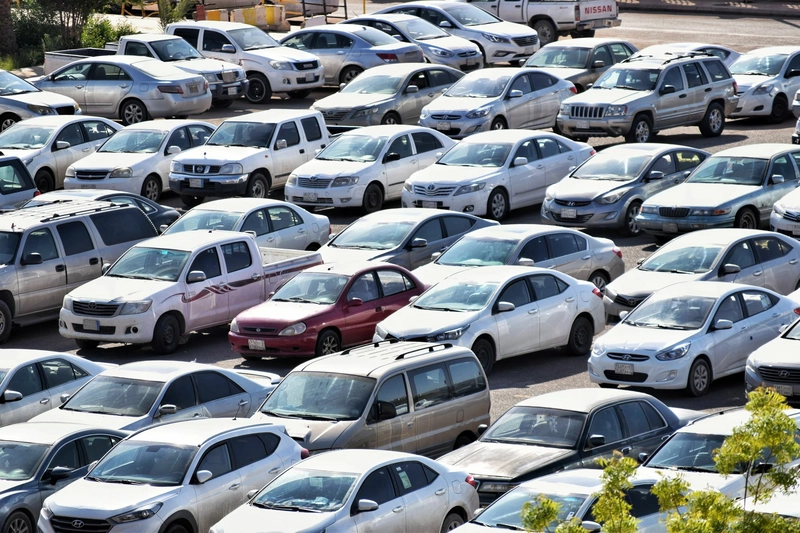

In [203]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [204]:
#Load data
df = pd.read_csv(r"C:\Users\Win\OneDrive\For Students\EDA\EDA Used car price Prediction\data.csv")


In [205]:
df.head()

Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   
2                Luxury,High-Performance      Compact         Coupe   
3                     Luxury,Performance      Compact         Coupe   
4                                 Luxury      Compact   Convertible   

   highway MPG  city mpg  Popularity   MSRP  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500

In [206]:
df.shape

(11914, 16)

#### Observation:
We have 11914 rows and 16 columns in this dataset

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

#### Observation:
- We have 3 columns as float data type, 5 columns as int data type and 8 columns are of object data type.
- There are some missing values in some of the columns. Lets analyse it in subsequent steps.

In [210]:
# Rename The columns
df.rename(
    {'Engine Fuel Type' : 'Fuel_type',
     'Engine HP': 'Horse_Power',
     'Engine Cylinders':'Cylinders',
     'Transmission Type':'Transmission_Type',
     'Number of Doors':'Number_of_Doors',
     'Market Category':'Market_Category',
     'Vehicle Size':'Vehicle_Size',
     'Vehicle Style':'Vehicle_Style',
     'highway MPG':'highway_MPG',
     'city mpg':'city_MPG',
     'MSRP':'Price'},inplace = True, axis = 1)  

In [211]:
# rechecking
df.rename({' Horse_Power':"Horse_Power"},inplace = True, axis=1)
df.columns

Index(['Make', 'Model', 'Year', 'Fuel_type', 'Horse_Power', 'Cylinders',
       'Transmission_Type', 'Driven_Wheels', 'Number_of_Doors',
       'Market_Category', 'Vehicle_Size', 'Vehicle_Style', 'highway_MPG',
       'city_MPG', 'Popularity', 'Price'],
      dtype='object')

## Univariate Analysis : Non Visual 

In [213]:
# Dividing numerical and categorical dataframes.
numerical_df = df.select_dtypes(include=['int64','float64'])
cat_df =df.select_dtypes(include='object')

In [214]:
numerical_df.columns

Index(['Year', 'Horse_Power', 'Cylinders', 'Number_of_Doors', 'highway_MPG',
       'city_MPG', 'Popularity', 'Price'],
      dtype='object')

In [215]:
cat_df.columns

Index(['Make', 'Model', 'Fuel_type', 'Transmission_Type', 'Driven_Wheels',
       'Market_Category', 'Vehicle_Size', 'Vehicle_Style'],
      dtype='object')

In [216]:
# Define a function to find unique, number of unique values, value counts.
def cat_univariate_analysis(df):
    for col in df:
        print("-"*10,df[col],"-"*10)
        print(df[col].agg(['count','nunique','unique']))
        print('Value counts : \n',df[col].value_counts())
        print()

In [217]:
cat_univariate_analysis(cat_df)

---------- 0            BMW
1            BMW
2            BMW
3            BMW
4            BMW
          ...   
11909      Acura
11910      Acura
11911      Acura
11912      Acura
11913    Lincoln
Name: Make, Length: 11914, dtype: object ----------
count                                                  11914
nunique                                                   48
unique     [BMW, Audi, FIAT, Mercedes-Benz, Chrysler, Nis...
Name: Make, dtype: object
Value counts : 
 Make
Chevrolet        1123
Ford              881
Volkswagen        809
Toyota            746
Dodge             626
Nissan            558
GMC               515
Honda             449
Mazda             423
Cadillac          397
Mercedes-Benz     353
Suzuki            351
BMW               334
Infiniti          330
Audi              328
Hyundai           303
Volvo             281
Subaru            256
Acura             252
Kia               231
Mitsubishi        213
Lexus             202
Buick             196
Chrysler     

In [218]:
# Non visual analysis for numerical columns
numerical_df.describe()

Year  Horse_Power     Cylinders  Number_of_Doors   highway_MPG  \
count  11914.000000  11845.00000  11884.000000     11908.000000  11914.000000   
mean    2010.384338    249.38607      5.628829         3.436093     26.637485   
std        7.579740    109.19187      1.780559         0.881315      8.863001   
min     1990.000000     55.00000      0.000000         2.000000     12.000000   
25%     2007.000000    170.00000      4.000000         2.000000     22.000000   
50%     2015.000000    227.00000      6.000000         4.000000     26.000000   
75%     2016.000000    300.00000      6.000000         4.000000     30.000000   
max     2017.000000   1001.00000     16.000000         4.000000    354.000000   

           city_MPG    Popularity         Price  
count  11914.000000  11914.000000  1.191400e+04  
mean      19.733255   1554.911197  4.059474e+04  
std        8.987798   1441.855347  6.010910e+04  
min        7.000000      2.000000  2.000000e+03  
25%       16.000000    549.000000  2.100000e+04  
50%       18.000000   1385.000000  2.999500e+04  
75%       22.000000   2009.000000  4.223125e+04  
max      137.000000   5657.000000  2.065902e+06

# Missing Values Handling

In [220]:
#check if we have any missing values
df.isna().sum()

Make                    0
Model                   0
Year                    0
Fuel_type               3
Horse_Power            69
Cylinders              30
Transmission_Type       0
Driven_Wheels           0
Number_of_Doors         6
Market_Category      3742
Vehicle_Size            0
Vehicle_Style           0
highway_MPG             0
city_MPG                0
Popularity              0
Price                   0
dtype: int64

In [221]:
#Imputing the missing values in Fuel type column.
df[df['Fuel_type'].isna()]

Make   Model  Year Fuel_type  Horse_Power  Cylinders  \
11321  Suzuki  Verona  2004       NaN        155.0        6.0   
11322  Suzuki  Verona  2004       NaN        155.0        6.0   
11323  Suzuki  Verona  2004       NaN        155.0        6.0   

      Transmission_Type      Driven_Wheels  Number_of_Doors Market_Category  \
11321         AUTOMATIC  front wheel drive              4.0             NaN   
11322         AUTOMATIC  front wheel drive              4.0             NaN   
11323         AUTOMATIC  front wheel drive              4.0             NaN   

      Vehicle_Size Vehicle_Style  highway_MPG  city_MPG  Popularity  Price  
11321      Midsize         Sedan           25        17         481  17199  
11322      Midsize         Sedan           25        17         481  20199  
11323      Midsize         Sedan           25        17         481  18499

In [222]:
df[(df['Make']=='Suzuki') & (df['Model'] == 'Verona')]

Make   Model  Year         Fuel_type  Horse_Power  Cylinders  \
11321  Suzuki  Verona  2004               NaN        155.0        6.0   
11322  Suzuki  Verona  2004               NaN        155.0        6.0   
11323  Suzuki  Verona  2004               NaN        155.0        6.0   
11324  Suzuki  Verona  2005  regular unleaded        155.0        6.0   
11325  Suzuki  Verona  2005  regular unleaded        155.0        6.0   
11326  Suzuki  Verona  2005  regular unleaded        155.0        6.0   
11327  Suzuki  Verona  2005  regular unleaded        155.0        6.0   
11328  Suzuki  Verona  2006  regular unleaded        155.0        6.0   
11329  Suzuki  Verona  2006  regular unleaded        155.0        6.0   

      Transmission_Type      Driven_Wheels  Number_of_Doors Market_Category  \
11321         AUTOMATIC  front wheel drive              4.0             NaN   
11322         AUTOMATIC  front wheel drive              4.0             NaN   
11323         AUTOMATIC  front wheel drive              4.0             NaN   
11324         AUTOMATIC  front wheel drive              4.0             NaN   
11325         AUTOMATIC  front wheel drive              4.0             NaN   
11326         AUTOMATIC  front wheel drive              4.0             NaN   
11327         AUTOMATIC  front wheel drive              4.0             NaN   
11328         AUTOMATIC  front wheel drive              4.0             NaN   
11329         AUTOMATIC  front wheel drive              4.0             NaN   

      Vehicle_Size Vehicle_Style  highway_MPG  city_MPG  Popularity  Price  
11321      Midsize         Sedan           25        17         481  17199  
11322      Midsize         Sedan           25        17         481  20199  
11323      Midsize         Sedan           25        17         481  18499  
11324      Midsize         Sedan           25        18         481  19349  
11325      Midsize         Sedan           25        18         481  21049  
11326      Midsize         Sedan           25        18         481  17549  
11327      Midsize         Sedan           25        18         481  20549  
11328      Midsize         Sedan           25        17         481  20299  
11329      Midsize         Sedan           25        17         481  18299

#### Obervation :
We found that other similar data points are having value for Fuel type as 'regular unleaded'.So replacing missing values for Fuel type column with this

In [224]:
df['Fuel_type']= df['Fuel_type'].fillna('regular unleaded',axis = 0) 

In [225]:
#rechecking
df.isna().sum()

Make                    0
Model                   0
Year                    0
Fuel_type               0
Horse_Power            69
Cylinders              30
Transmission_Type       0
Driven_Wheels           0
Number_of_Doors         6
Market_Category      3742
Vehicle_Size            0
Vehicle_Style           0
highway_MPG             0
city_MPG                0
Popularity              0
Price                   0
dtype: int64

In [226]:
# checking rows which has missing values for Horse Power column
df[df['Horse_Power'].isna()]

Make        Model  Year                       Fuel_type  Horse_Power  \
539      FIAT         500e  2015                        electric          NaN   
540      FIAT         500e  2016                        electric          NaN   
541      FIAT         500e  2017                        electric          NaN   
2905  Lincoln  Continental  2017  premium unleaded (recommended)          NaN   
2906  Lincoln  Continental  2017  premium unleaded (recommended)          NaN   
...       ...          ...   ...                             ...          ...   
9850      Kia      Soul EV  2015                        electric          NaN   
9851      Kia      Soul EV  2015                        electric          NaN   
9852      Kia      Soul EV  2016                        electric          NaN   
9853      Kia      Soul EV  2016                        electric          NaN   
9854      Kia      Soul EV  2016                        electric          NaN   

      Cylinders Transmission_Type      Driven_Wheels  Number_of_Doors  \
539         0.0      DIRECT_DRIVE  front wheel drive              2.0   
540         0.0      DIRECT_DRIVE  front wheel drive              2.0   
541         0.0      DIRECT_DRIVE  front wheel drive              2.0   
2905        6.0         AUTOMATIC    all wheel drive              4.0   
2906        6.0         AUTOMATIC  front wheel drive              4.0   
...         ...               ...                ...              ...   
9850        0.0      DIRECT_DRIVE  front wheel drive              4.0   
9851        0.0      DIRECT_DRIVE  front wheel drive              4.0   
9852        0.0      DIRECT_DRIVE  front wheel drive              4.0   
9853        0.0      DIRECT_DRIVE  front wheel drive              4.0   
9854        0.0      DIRECT_DRIVE  front wheel drive              4.0   

     Market_Category Vehicle_Size  Vehicle_Style  highway_MPG  city_MPG  \
539        Hatchback      Compact  2dr Hatchback          108       122   
540        Hatchback      Compact  2dr Hatchback          103       121   
541        Hatchback      Compact  2dr Hatchback          103       121   
2905          Luxury        Large          Sedan           25        17   
2906          Luxury        Large          Sedan           27        18   
...              ...          ...            ...          ...       ...   
9850             NaN      Compact          Wagon           92       120   
9851             NaN      Compact          Wagon           92       120   
9852             NaN      Compact          Wagon           92       120   
9853             NaN      Compact          Wagon           92       120   
9854             NaN      Compact          Wagon           92       120   

      Popularity  Price  
539          819  31800  
540          819  31800  
541          819  31800  
2905          61  55915  
2906          61  62915  
...          ...    ...  
9850        1720  35700  
9851        1720  33700  
9852        1720  33950  
9853        1720  31950  
9854        1720  35950  

[69 rows x 16 columns]

In [227]:
df['Horse_Power'] = df.groupby(by = 'Make')['Horse_Power'].transform(lambda x :x.fillna(x.mean()))

In [228]:
df.isna().sum()

Make                    0
Model                   0
Year                    0
Fuel_type               0
Horse_Power            18
Cylinders              30
Transmission_Type       0
Driven_Wheels           0
Number_of_Doors         6
Market_Category      3742
Vehicle_Size            0
Vehicle_Style           0
highway_MPG             0
city_MPG                0
Popularity              0
Price                   0
dtype: int64

In [229]:
df[df['Horse_Power'].isna()]

Make    Model  Year Fuel_type  Horse_Power  Cylinders  \
6921  Tesla  Model S  2014  electric          NaN        0.0   
6922  Tesla  Model S  2014  electric          NaN        0.0   
6923  Tesla  Model S  2014  electric          NaN        0.0   
6924  Tesla  Model S  2014  electric          NaN        0.0   
6925  Tesla  Model S  2015  electric          NaN        0.0   
6926  Tesla  Model S  2015  electric          NaN        0.0   
6927  Tesla  Model S  2015  electric          NaN        0.0   
6928  Tesla  Model S  2015  electric          NaN        0.0   
6929  Tesla  Model S  2015  electric          NaN        0.0   
6930  Tesla  Model S  2016  electric          NaN        0.0   
6931  Tesla  Model S  2016  electric          NaN        0.0   
6932  Tesla  Model S  2016  electric          NaN        0.0   
6933  Tesla  Model S  2016  electric          NaN        0.0   
6934  Tesla  Model S  2016  electric          NaN        0.0   
6935  Tesla  Model S  2016  electric          NaN        0.0   
6936  Tesla  Model S  2016  electric          NaN        0.0   
6937  Tesla  Model S  2016  electric          NaN        0.0   
6938  Tesla  Model S  2016  electric          NaN        0.0   

     Transmission_Type     Driven_Wheels  Number_of_Doors  \
6921      DIRECT_DRIVE  rear wheel drive              4.0   
6922      DIRECT_DRIVE  rear wheel drive              4.0   
6923      DIRECT_DRIVE   all wheel drive              4.0   
6924      DIRECT_DRIVE  rear wheel drive              4.0   
6925      DIRECT_DRIVE  rear wheel drive              4.0   
6926      DIRECT_DRIVE   all wheel drive              4.0   
6927      DIRECT_DRIVE   all wheel drive              4.0   
6928      DIRECT_DRIVE   all wheel drive              4.0   
6929      DIRECT_DRIVE  rear wheel drive              4.0   
6930      DIRECT_DRIVE   all wheel drive              NaN   
6931      DIRECT_DRIVE   all wheel drive              NaN   
6932      DIRECT_DRIVE   all wheel drive              NaN   
6933      DIRECT_DRIVE  rear wheel drive              NaN   
6934      DIRECT_DRIVE   all wheel drive              NaN   
6935      DIRECT_DRIVE   all wheel drive              4.0   
6936      DIRECT_DRIVE   all wheel drive              4.0   
6937      DIRECT_DRIVE   all wheel drive              4.0   
6938      DIRECT_DRIVE  rear wheel drive              4.0   

              Market_Category Vehicle_Size Vehicle_Style  highway_MPG  \
6921  Exotic,High-Performance        Large         Sedan           90   
6922       Exotic,Performance        Large         Sedan           97   
6923  Exotic,High-Performance        Large         Sedan           94   
6924  Exotic,High-Performance        Large         Sedan           90   
6925       Exotic,Performance        Large         Sedan           97   
6926       Exotic,Performance        Large         Sedan          102   
6927  Exotic,High-Performance        Large         Sedan          106   
6928  Exotic,High-Performance        Large         Sedan           98   
6929       Exotic,Performance        Large         Sedan           90   
6930       Exotic,Performance        Large         Sedan          105   
6931       Exotic,Performance        Large         Sedan          101   
6932  Exotic,High-Performance        Large         Sedan          105   
6933       Exotic,Performance        Large         Sedan          100   
6934       Exotic,Performance        Large         Sedan          107   
6935       Exotic,Performance        Large         Sedan          102   
6936  Exotic,High-Performance        Large         Sedan          107   
6937  Exotic,High-Performance        Large         Sedan          100   
6938       Exotic,Performance        Large         Sedan           90   

      city_MPG  Popularity   Price  
6921        88        1391   79900  
6922        94        1391   69900  
6923        86        1391  104500  
6924        88        1391   93400  
6925        94        1391   69900  
6926       101      

In [230]:
df['Horse_Power'] = df['Horse_Power'].fillna(328) # filling missimg values with fixed values. We got theis value by doing research

In [231]:
#rechecking
df.isna().sum()

Make                    0
Model                   0
Year                    0
Fuel_type               0
Horse_Power             0
Cylinders              30
Transmission_Type       0
Driven_Wheels           0
Number_of_Doors         6
Market_Category      3742
Vehicle_Size            0
Vehicle_Style           0
highway_MPG             0
city_MPG                0
Popularity              0
Price                   0
dtype: int64

In [232]:
df[df['Cylinders'].isna()]

Make    Model  Year                    Fuel_type  Horse_Power  \
1983   Chevrolet  Bolt EV  2017                     electric   200.000000   
1984   Chevrolet  Bolt EV  2017                     electric   200.000000   
3716  Volkswagen   e-Golf  2015                     electric   115.000000   
3717  Volkswagen   e-Golf  2015                     electric   115.000000   
3718  Volkswagen   e-Golf  2016                     electric   115.000000   
3719  Volkswagen   e-Golf  2016                     electric   115.000000   
5778  Mitsubishi   i-MiEV  2014                     electric   173.429245   
5779  Mitsubishi   i-MiEV  2016                     electric    66.000000   
5780  Mitsubishi   i-MiEV  2017                     electric    66.000000   
8373      Toyota  RAV4 EV  2012                     electric   154.000000   
8695       Mazda     RX-7  1993             regular unleaded   255.000000   
8696       Mazda     RX-7  1994             regular unleaded   255.000000   
8697       Mazda     RX-7  1995             regular unleaded   255.000000   
8698       Mazda     RX-8  2009  premium unleaded (required)   232.000000   
8699       Mazda     RX-8  2009  premium unleaded (required)   212.000000   
8700       Mazda     RX-8  2009  premium unleaded (required)   232.000000   
8701       Mazda     RX-8  2009  premium unleaded (required)   232.000000   
8702       Mazda     RX-8  2009  premium unleaded (required)   232.000000   
8703       Mazda     RX-8  2009  premium unleaded (required)   212.000000   
8704       Mazda     RX-8  2009  premium unleaded (required)   212.000000   
8705       Mazda     RX-8  2010  premium unleaded (required)   232.000000   
8706       Mazda     RX-8  2010  premium unleaded (required)   212.000000   
8707       Mazda     RX-8  2010  premium unleaded (required)   212.000000   
8708       Mazda     RX-8  2010  premium unleaded (required)   232.000000   
8709       Mazda     RX-8  2010  premium unleaded (required)   232.000000   
8710       Mazda     RX-8  2011  premium unleaded (required)   212.000000   
8711       Mazda     RX-8  2011  premium unleaded (required)   232.000000   
8712       Mazda     RX-8  2011  premium unleaded (required)   232.000000   
8713       Mazda     RX-8  2011  premium unleaded (required)   232.000000   
8714       Mazda     RX-8  2011  premium unleaded (required)   212.000000   

      Cylinders Transmission_Type      Driven_Wheels  Number_of_Doors  \
1983        NaN      DIRECT_DRIVE  front wheel drive              4.0   
1984        NaN      DIRECT_DRIVE  front wheel drive              4.0   
3716        NaN      DIRECT_DRIVE  front wheel drive              4.0   
3717        NaN      DIRECT_DRIVE  front wheel drive              4.0   
3718        NaN      DIRECT_DRIVE  front wheel drive              4.0   
3719        NaN      DIRECT_DRIVE  front wheel drive              4.0   
5778        NaN      DIRECT_DRIVE   rear wheel drive              4.0   
5779        NaN      DIRECT_DRIVE   rear wheel drive              4.0   
5780        NaN      DIRECT_DRIVE   rear wheel drive              4.0   
8373        NaN      DIRECT_DRIVE  front wheel drive              4.0   
8695        NaN            MANUAL   rear wheel drive              2.0   
8696        NaN            MANUAL   rear wheel drive              2.0   
8697        NaN            MANUAL   rear wheel drive              2.0   
8698        NaN            MANUAL   rear wheel drive              4.0   
8699        NaN         AUTOMATIC   rear wheel drive              4.0   
8700        NaN            MANUAL   rear wheel drive              4.0   
8701        NaN            MANUAL   rear wheel drive              4.0   
8702        NaN            MANUAL   rear wheel drive              4.0   
8703        NaN         AUTOMATIC   rear wheel drive              4.0   
8704        NaN         AUTOMATIC   rear wheel drive              4.0   
8705        NaN            MANUAL   rear wheel drive              4.0   
8706        NaN   

In [233]:
df['Cylinders'] = df.groupby(by = 'Make')['Cylinders'].transform(lambda x :x.fillna(x.mean()))

In [234]:
# rechecking
df.isna().sum()

Make                    0
Model                   0
Year                    0
Fuel_type               0
Horse_Power             0
Cylinders               0
Transmission_Type       0
Driven_Wheels           0
Number_of_Doors         6
Market_Category      3742
Vehicle_Size            0
Vehicle_Style           0
highway_MPG             0
city_MPG                0
Popularity              0
Price                   0
dtype: int64

In [235]:
df[df['Number_of_Doors'].isna()]

Make    Model  Year                    Fuel_type  Horse_Power  \
4666  Ferrari       FF  2013  premium unleaded (required)        651.0   
6930    Tesla  Model S  2016                     electric        328.0   
6931    Tesla  Model S  2016                     electric        328.0   
6932    Tesla  Model S  2016                     electric        328.0   
6933    Tesla  Model S  2016                     electric        328.0   
6934    Tesla  Model S  2016                     electric        328.0   

      Cylinders Transmission_Type     Driven_Wheels  Number_of_Doors  \
4666       12.0  AUTOMATED_MANUAL   all wheel drive              NaN   
6930        0.0      DIRECT_DRIVE   all wheel drive              NaN   
6931        0.0      DIRECT_DRIVE   all wheel drive              NaN   
6932        0.0      DIRECT_DRIVE   all wheel drive              NaN   
6933        0.0      DIRECT_DRIVE  rear wheel drive              NaN   
6934        0.0      DIRECT_DRIVE   all wheel drive              NaN   

              Market_Category Vehicle_Size Vehicle_Style  highway_MPG  \
4666  Exotic,High-Performance        Large         Coupe           16   
6930       Exotic,Performance        Large         Sedan          105   
6931       Exotic,Performance        Large         Sedan          101   
6932  Exotic,High-Performance        Large         Sedan          105   
6933       Exotic,Performance        Large         Sedan          100   
6934       Exotic,Performance        Large         Sedan          107   

      city_MPG  Popularity   Price  
4666        11        2774  295000  
6930       102        1391   79500  
6931        98        1391   66000  
6932        92        1391  134500  
6933        97        1391   74500  
6934       101        1391   71000

In [236]:
# Filling the values by doing research
df.loc[(df['Make']=='Ferrari') & (df['Number_of_Doors'].isna()),'Number_of_Doors']=2
df.loc[(df['Make']=='Tesla') & (df['Number_of_Doors'].isna()),'Number_of_Doors']=4

In [237]:
#rechecking
df.isna().sum()

Make                    0
Model                   0
Year                    0
Fuel_type               0
Horse_Power             0
Cylinders               0
Transmission_Type       0
Driven_Wheels           0
Number_of_Doors         0
Market_Category      3742
Vehicle_Size            0
Vehicle_Style           0
highway_MPG             0
city_MPG                0
Popularity              0
Price                   0
dtype: int64

In [238]:
# checking value caounts for each ccategory
df['Market_Category'].value_counts()

Market_Category
Crossover                                          1110
Flex Fuel                                           872
Luxury                                              855
Luxury,Performance                                  673
Hatchback                                           641
                                                   ... 
Crossover,Exotic,Luxury,Performance                   1
Exotic,Luxury,High-Performance,Hybrid                 1
Crossover,Exotic,Luxury,High-Performance              1
Flex Fuel,Factory Tuner,Luxury,High-Performance       1
Performance,Hybrid                                    1
Name: count, Length: 71, dtype: int64

In [239]:
df['Market_Category'].mode()

0    Crossover
Name: Market_Category, dtype: object

In [240]:
# replacing the missing values with mode
df['Market_Category']= df['Market_Category'].fillna(df['Market_Category'].mode()[0])

In [241]:
#rechecking
df.isna().sum()

Make                 0
Model                0
Year                 0
Fuel_type            0
Horse_Power          0
Cylinders            0
Transmission_Type    0
Driven_Wheels        0
Number_of_Doors      0
Market_Category      0
Vehicle_Size         0
Vehicle_Style        0
highway_MPG          0
city_MPG             0
Popularity           0
Price                0
dtype: int64

## handling duplicate rows

In [243]:
df.duplicated().sum()

715

#### Observation:
We have 715 duplicate rows.

In [245]:
df[df.duplicated()]

Make     Model  Year                    Fuel_type  Horse_Power  \
14        BMW  1 Series  2013  premium unleaded (required)        230.0   
18       Audi       100  1992             regular unleaded        172.0   
20       Audi       100  1992             regular unleaded        172.0   
24       Audi       100  1993             regular unleaded        172.0   
25       Audi       100  1993             regular unleaded        172.0   
...       ...       ...   ...                          ...          ...   
11481  Suzuki      X-90  1998             regular unleaded         95.0   
11603   Volvo      XC60  2017             regular unleaded        302.0   
11604   Volvo      XC60  2017             regular unleaded        240.0   
11708  Suzuki       XL7  2008             regular unleaded        252.0   
11717  Suzuki       XL7  2008             regular unleaded        252.0   

       Cylinders Transmission_Type      Driven_Wheels  Number_of_Doors  \
14           6.0            MANUAL   rear wheel drive              2.0   
18           6.0            MANUAL  front wheel drive              4.0   
20           6.0            MANUAL  front wheel drive              4.0   
24           6.0            MANUAL  front wheel drive              4.0   
25           6.0            MANUAL  front wheel drive              4.0   
...          ...               ...                ...              ...   
11481        4.0            MANUAL   four wheel drive              2.0   
11603        4.0         AUTOMATIC    all wheel drive              4.0   
11604        4.0         AUTOMATIC  front wheel drive              4.0   
11708        6.0         AUTOMATIC    all wheel drive              4.0   
11717        6.0         AUTOMATIC  front wheel drive              4.0   

                    Market_Category Vehicle_Size Vehicle_Style  highway_MPG  \
14               Luxury,Performance      Compact         Coupe           28   
18                           Luxury      Midsize         Sedan           24   
20                           Luxury      Midsize         Sedan           24   
24                           Luxury      Midsize         Sedan           24   
25                           Luxury      Midsize         Sedan           24   
...                             ...          ...           ...          ...   
11481                     Crossover      Compact       2dr SUV           26   
11603  Crossover,Luxury,Performance      Midsize       4dr SUV           29   
11604              Crossover,Luxury      Midsize       4dr SUV           30   
11708                     Crossover      Midsize       4dr SUV           22   
11717                     Crossover      Midsize       4dr SUV           22   

       city_MPG  Popularity  Price  
14           19        3916  31500  
18           17        3105   2000  
20           17        3105   2000  
24           17        3105   2000  
25           17        3105   2000  
...         ...         ...    ...  
11481        22         481   2000  
11603        20         870  46350  
11604        23         870  40950  
11708        15         481  29149  
11717        16         481  27499  

[715 rows x 16 columns]

In [246]:
df.drop_duplicates(inplace = True,ignore_index = True)

In [247]:
#rechecking
df.duplicated().sum()

0

# 2. Univariate - Visual Analysis of Numerical Columns

In [312]:
# Let's Create all three distribution plots for each numerical column
def plot_numerical_analysis(df,column):
    plt.figure(figsize = (10,5)) # Create canvas

    # Histogram
    plt.subplot(2,2,1)
    sns.histplot(x = column, data = df,color = 'skyblue',edgecolor ='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    #Kdeplot
    plt.subplot(2,2,2)
    sns.kdeplot(x = column, data = df,color = 'magenta')
    plt.title(f'KDE of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # boxplot
    plt.subplot(2,2,3)
    sns.boxplot(x = column, data = df,color = 'salmon')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

In [305]:
numerical_df.columns


Index(['Year', 'Horse_Power', 'Cylinders', 'Number_of_Doors', 'highway_MPG',
       'city_MPG', 'Popularity', 'Price'],
      dtype='object')

### Analysis of Year

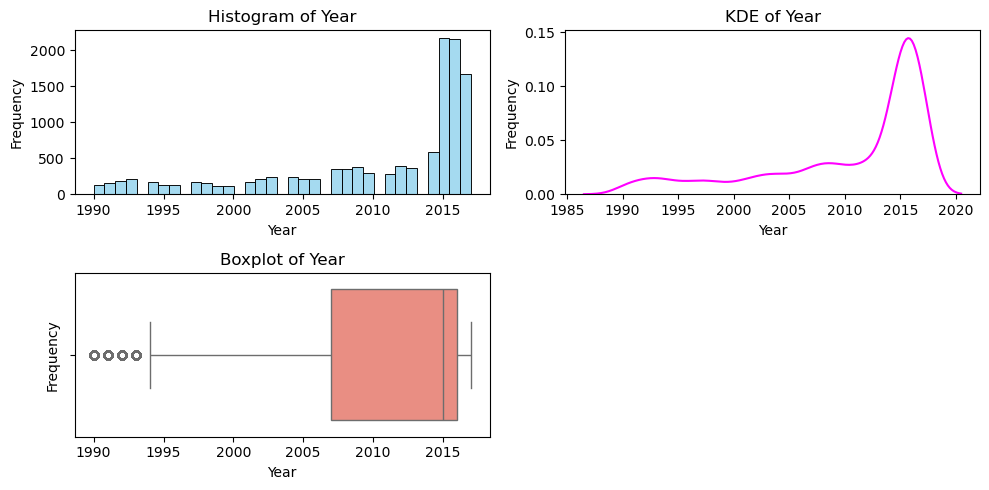

In [314]:
plot_numerical_analysis(numerical_df,'Year')

#### Observation:
1. The histogram of year column shows that the distribution is left skewed. This means that most values are concentrated on the higher end(
2. The KDE plot supports this by showing sharp peak on higher end.
3. The left side of the boxplot shows several outliers, which falls outside the lower whisker of the plot.

### Analysis Of Horse Power column

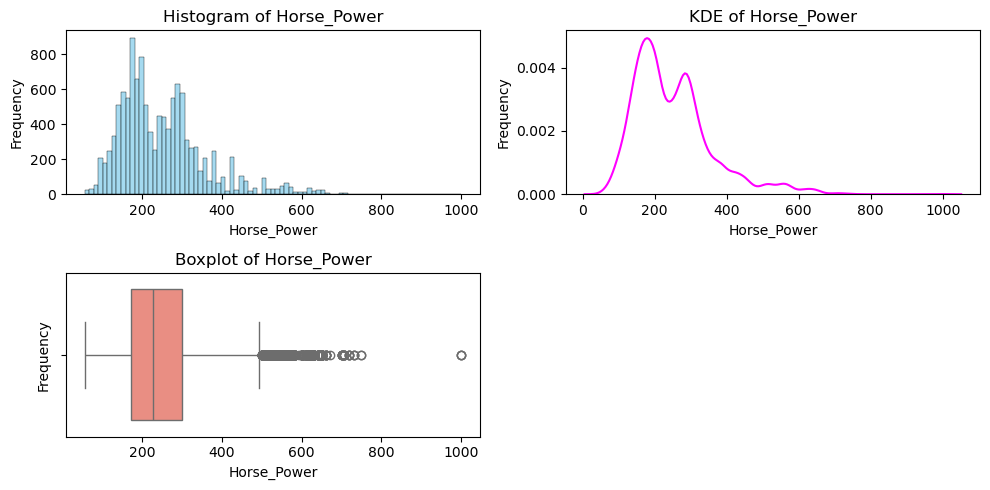

In [319]:
plot_numerical_analysis(numerical_df,'Horse_Power')

#### Observation:
1. The histgram displays a right skewed distribution. This means that most cars have lower horsepower values
2. The KDE supports this by showing sharp peak iin the lower horsepower range.
3. There are several outliers on the right side of the boxplot, there are some cars which have extremely high horse power.

### Analysis of Cylinders

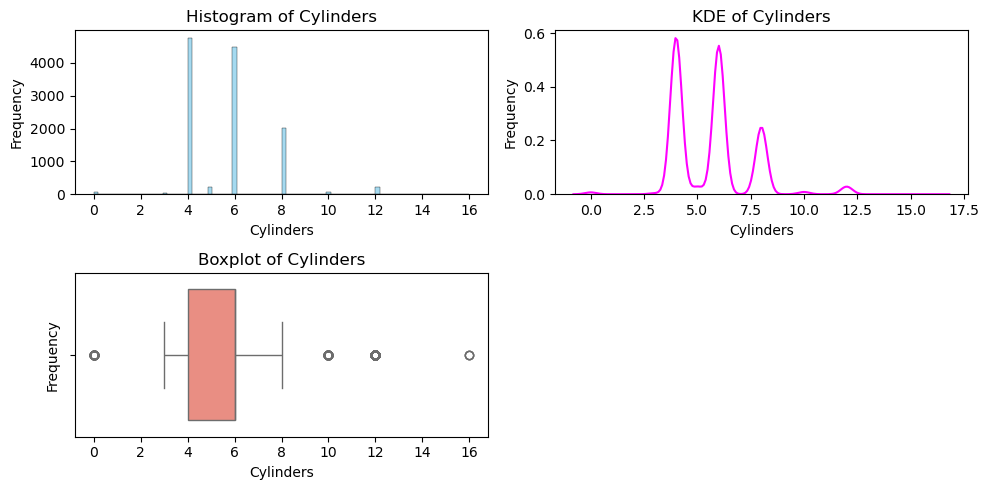

In [324]:
plot_numerical_analysis(numerical_df,'Cylinders')

#### Observation:
maximum cars have 4 or 6 cylinders

#### Analysis of Number_of_Doors

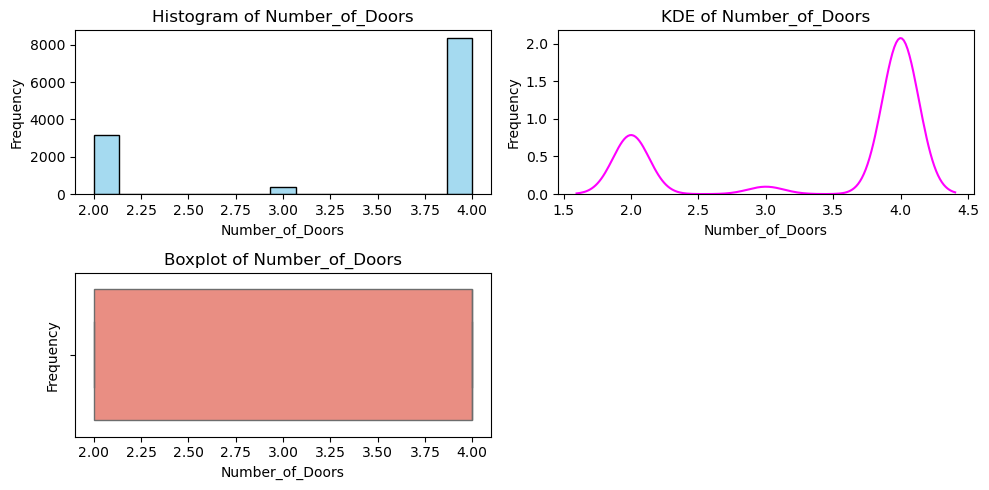

In [326]:
plot_numerical_analysis(numerical_df,'Number_of_Doors')

#### Observation:
maximum cars have 4 doors and some have 2 doors

#### Analysis Of highway_MPG

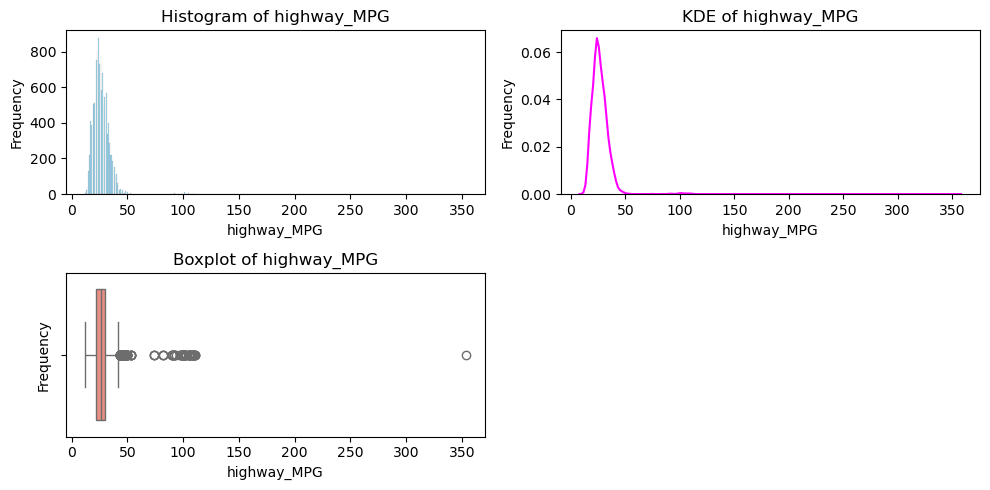

In [328]:
plot_numerical_analysis(numerical_df,'highway_MPG')

##### Observation :
maximum cars have 0 to 50 highway mpg. One outlier having more than 350 mpg

#### Analysis of City Mpg Column


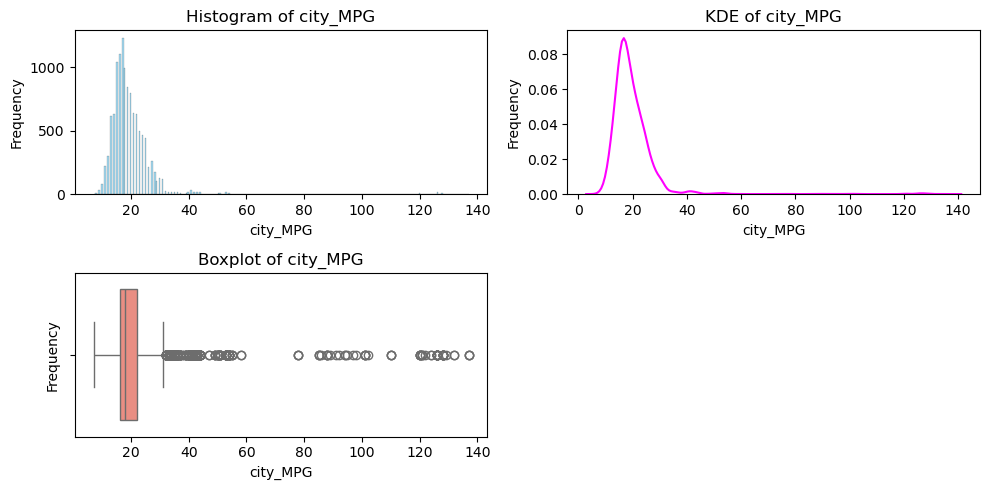

In [333]:
plot_numerical_analysis(numerical_df,'city_MPG')

#### Observation :
maximum cars have 10 to 30 city mpg. Many outliers can be seen

### Analysis of Popularity column 

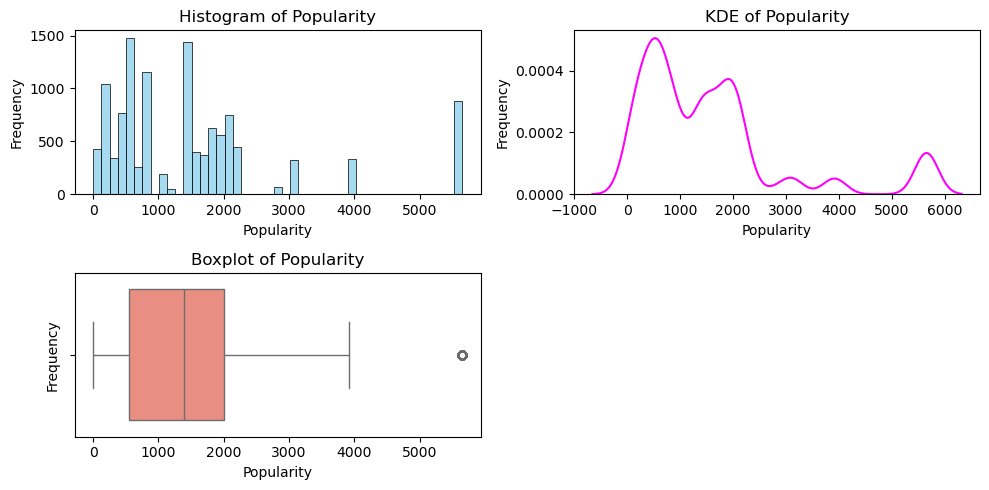

In [335]:
plot_numerical_analysis(numerical_df,'Popularity')

#### Observation: 
maximum cars have popularity as 0 to 2000 range. One outlier is present having Popularity greater than 5000.

#### Anaylysis of Price column

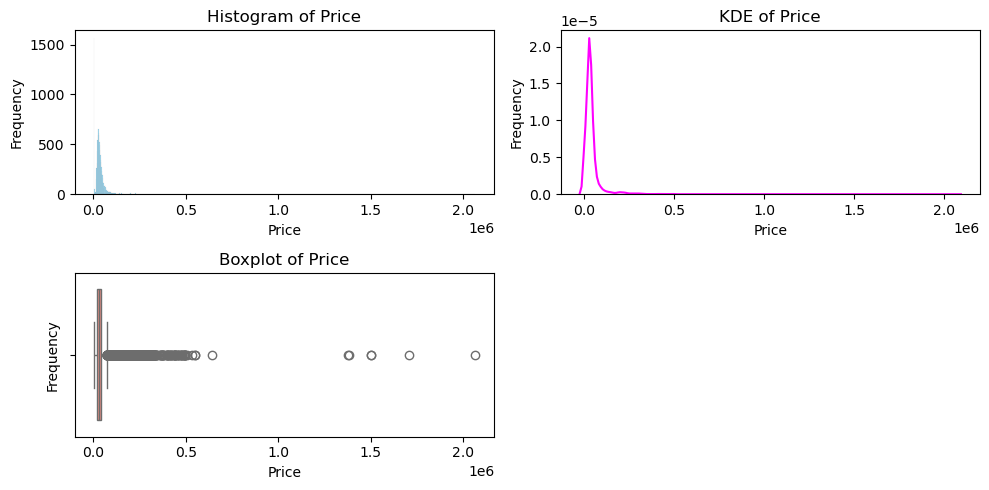

In [337]:
plot_numerical_analysis(numerical_df,'Price')

#### Observation: 
maximum cars have 1 lakh or 0.1 million

# Treating Outliers

In [340]:
# Lets check the skewness for all columns
df.skew(numeric_only = True)

Year               -1.260226
Horse_Power         1.246587
Cylinders           0.940777
Number_of_Doors    -1.019228
highway_MPG         7.759682
city_MPG            7.093660
Popularity          1.628305
Price              11.609709
dtype: float64

#### Obervation :
1. highway_MPG and city_MPG are the columns which has higher values of skewness, so we will treat them
2. As Price column is our target column, we need not to treat it.

In [349]:
# Method 1 : IQR Method
def get_IQRValues(df,column):
    q1,q2,q3 = df[column].quantile([0.25,0.5,0.75])
    iqr = q3 - q1
    ul = q3 + 1.5 * iqr
    ll = q1 - 1.5 * iqr
    return ul,ll


In [351]:
get_IQRValues(df,'highway_MPG')


(42.0, 10.0)

In [353]:
get_IQRValues(df,'city_MPG')

(31.0, 7.0)

In [359]:
def remove_outliers_IQR(df,num_col):
    df_cleaned = df.copy()
    for col in num_col:
        ul,ll = get_IQRValues(df_cleaned,col)
        df_cleaned = df_cleaned[(df_cleaned[col]>= ll) & (df_cleaned[col]<=ul)].reset_index(drop = True)
    return df_cleaned

In [363]:
num_cols = ['highway_MPG','city_MPG']

In [367]:
df_cleaned = remove_outliers_IQR(df,num_cols)

In [369]:
# Recheck
df_cleaned.skew(numeric_only = True)

Year               -1.225110
Horse_Power         1.242987
Cylinders           1.117306
Number_of_Doors    -0.986230
highway_MPG         0.379955
city_MPG            0.564112
Popularity          1.637428
Price              11.479077
dtype: float64

In [462]:
# Method 2 - Standard Deviation

mu = df['highway_MPG'].mean()
std = df['highway_MPG'].std()
print(mu,std)

# For city_mpg column
mu_city = df['city_MPG'].mean()
std_city = df['city_MPG'].std()
print(mu_city, std_city)


26.61059023127065 8.977640777760307
19.73185105813019 9.177555131581151


In [466]:
# Consider that any point that is above (mean + 3 * std) and below (mean - 3 * std) as outlier - For Highway mpg
ul = mu + 3 *std
ll = mu - 3 *std
print(ul, ll)


# Consider that any point that is above (mean + 3 * std) and below (mean - 3 * std) as outlier - For City MPG
ul_city = mu_city + 3 *std_city
ll_city = mu_city - 3 *std_city
print(ul_city, ll_city)

53.54351256455157 -0.3223321020102716
47.26451645287364 -7.800814336613264


In [470]:
 df_cleaned_std1= df.copy()
df_cleaned_std1 = df_cleaned_std1[(df_cleaned_std1['highway_MPG']>= ll) & (df_cleaned_std1['highway_MPG']<=ul) &
                                (df_cleaned_std1['city_MPG']>= ll_city) & (df_cleaned_std1['city_MPG']<=ul_city)].reset_index(drop = True)

In [472]:
df_cleaned_std1.skew(numeric_only = True)

Year               -1.246164
Horse_Power         1.247263
Cylinders           1.128942
Number_of_Doors    -1.005365
highway_MPG         0.496019
city_MPG            1.193363
Popularity          1.630003
Price              11.573051
dtype: float64

# Univariate - Visual Anlysis of Categorical Columns

In [410]:
def plot_categorical_analysis(df,column):
    plt.figure(figsize=(18,18))


    #countplot
    plt.subplot(3,1,1)
    sns.countplot(data = df,x = column,palette = 'Set2')
    plt.title(f' Count plot of {column}')
    plt.xlabel(column)
    plt.xticks(rotation = 90)
    plt.ylabel("Count")


    # Pie chart - by using pandas functions
    plt.subplot(3,1,2)
    df[column].value_counts().nlargest(10).plot.pie(autopct = '%1.1f%%',color =sns.color_palette('Set2')) 
    plt.title(f' Pie chartt of {column}')


    # bar plot 
    plt.subplot(3,1,3)
    #sns.barplot(data = df,x = column,color = 'Red',edgecolor = 'black')
    df[column].value_counts().plot(kind = 'bar',color = 'Red',edgecolor = 'black')
    plt.title(f' BAr plot of {column}')
    plt.xlabel(column)
    plt.xticks(rotation = 90)
    plt.ylabel("Frequency")


    plt.tight_layout()
    plt.show()
    
    
    

In [384]:
cat_df.columns

Index(['Make', 'Model', 'Fuel_type', 'Transmission_Type', 'Driven_Wheels',
       'Market_Category', 'Vehicle_Size', 'Vehicle_Style'],
      dtype='object')

#### Analysis of Make column

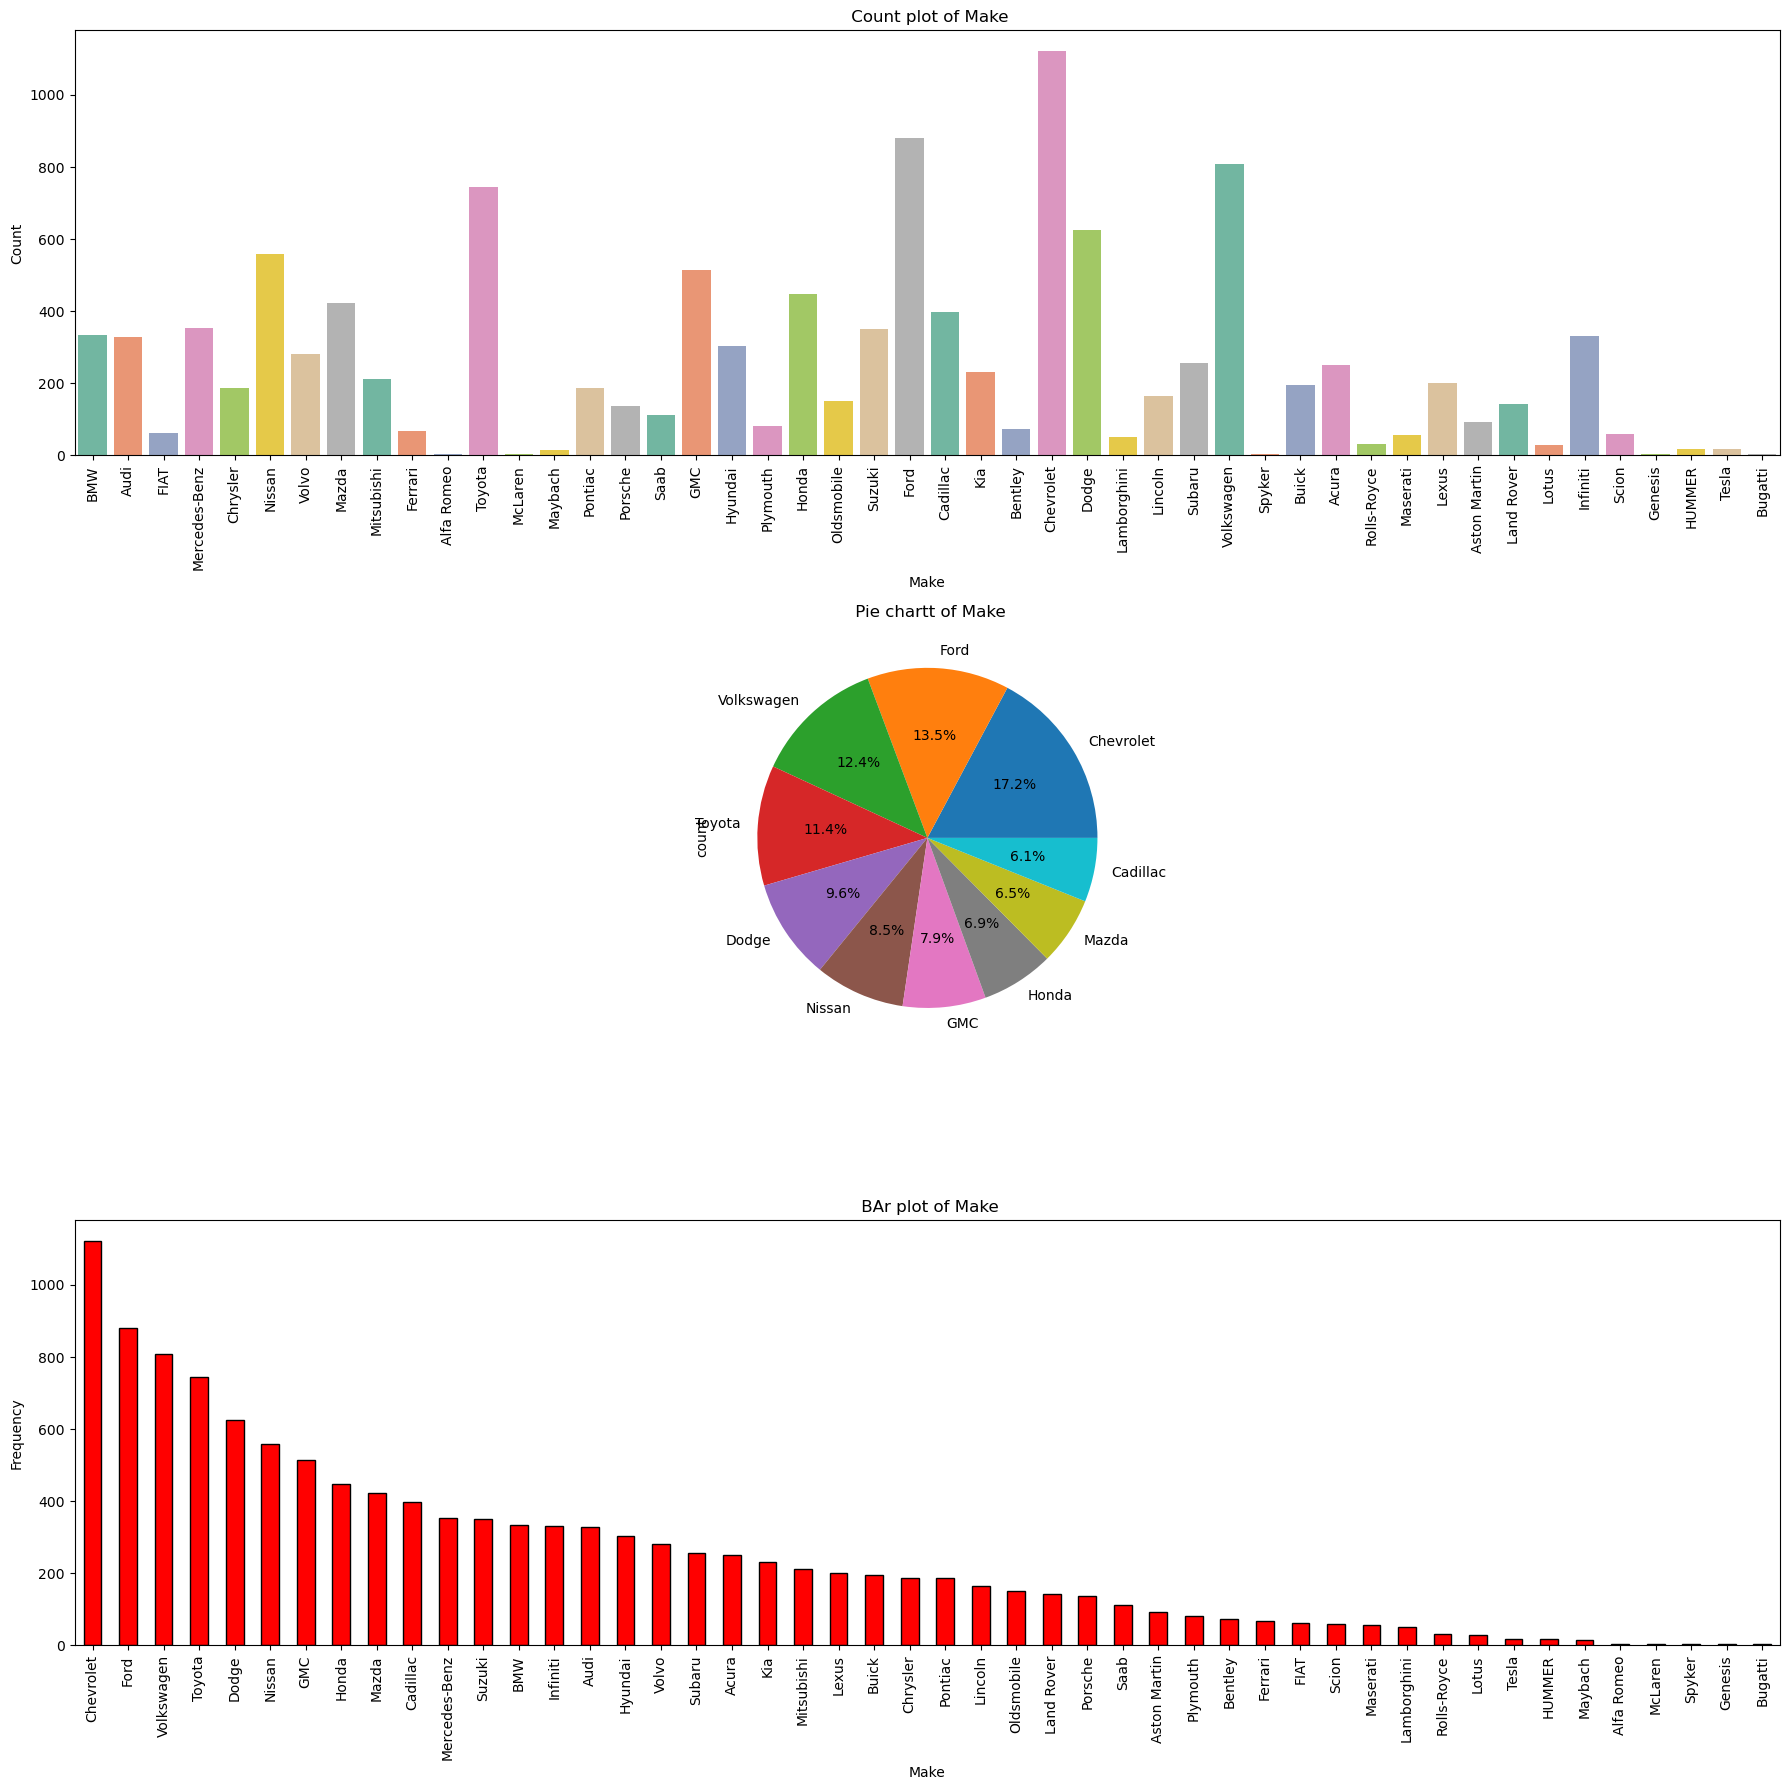

In [476]:
plot_categorical_analysis(cat_df,'Make')

In [396]:
# as there are many categories present in the columns, pie chart is becoming messy, hence, we took only first 10 categories of each colulm
df['Make'].value_counts().nlargest(10)

Make
Chevrolet     1083
Ford           825
Toyota         719
Volkswagen     568
Nissan         551
Dodge          529
GMC            482
Honda          433
Mazda          412
Cadillac       396
Name: count, dtype: int64

#### Observation:
 there are more than 1000 cars for the company 'Chevrolet' in our dataset. We also see that there just a few cars for companies such as 'Bugatti' and 'Genesis' 

### Analysis of Model column

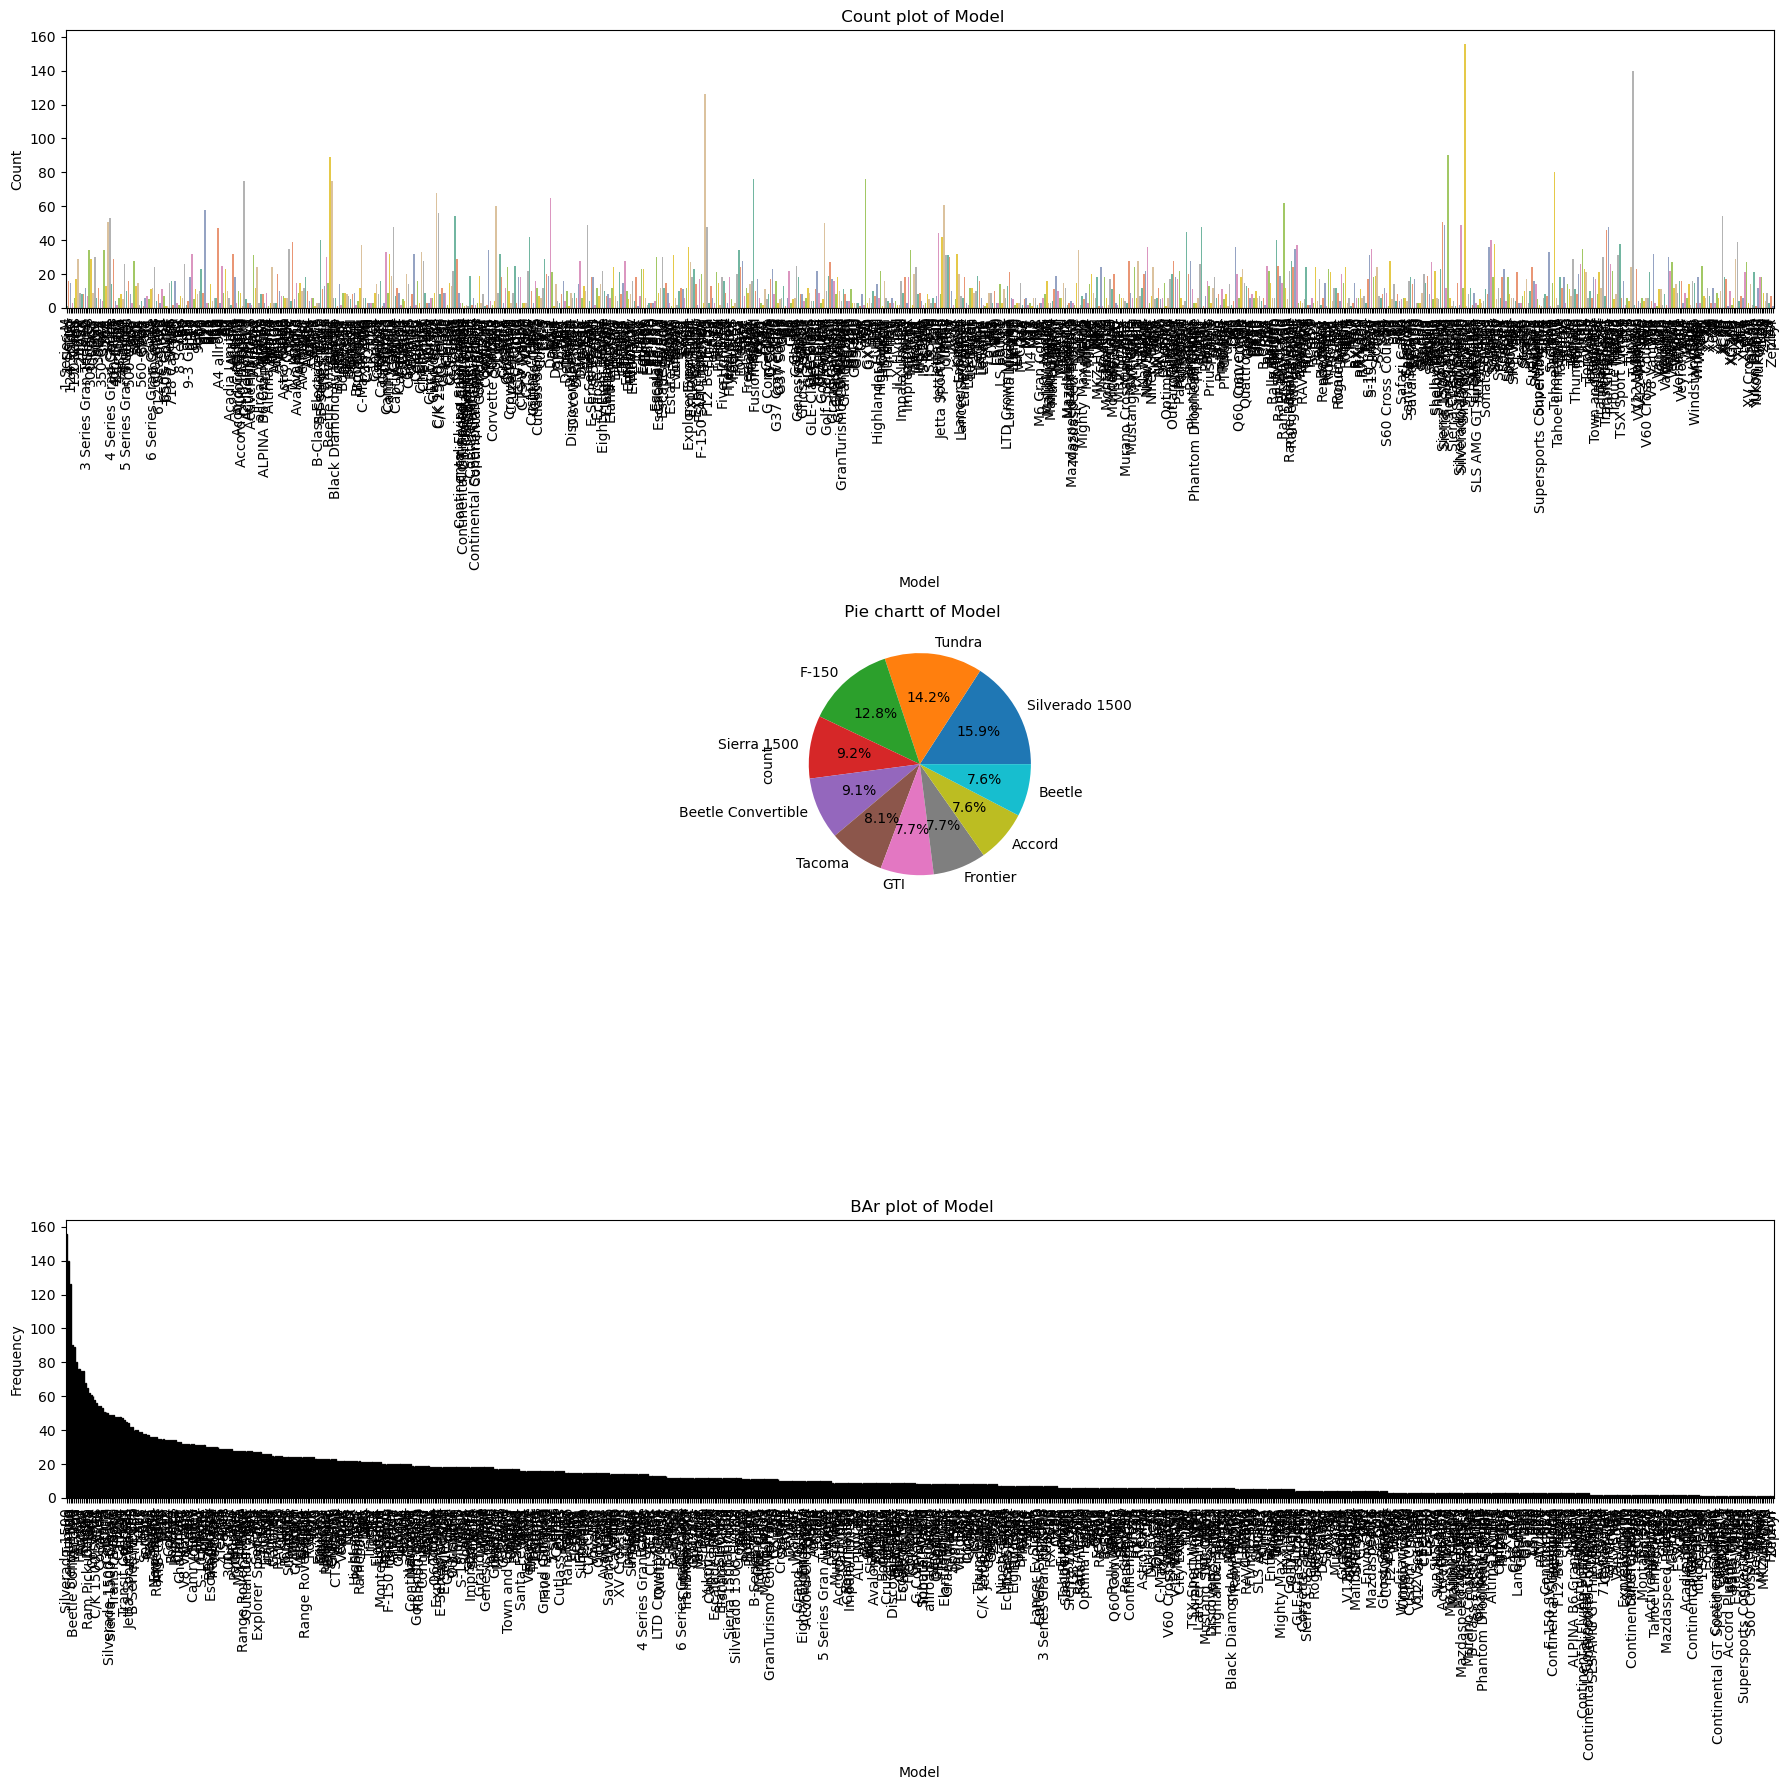

In [478]:
plot_categorical_analysis(cat_df,'Model')

The visualization is difficult to understand as the number of categories are more. Lets visualize only top 10 Models and put remianing cars in 'Other' category

In [486]:
cat_df['Model'].value_counts()

Model
Silverado 1500        156
Tundra                140
F-150                 126
Sierra 1500            90
Beetle Convertible     89
                     ... 
MKZ Hybrid              1
M4 GTS                  1
LFA                     1
Horizon                 1
Zephyr                  1
Name: count, Length: 915, dtype: int64

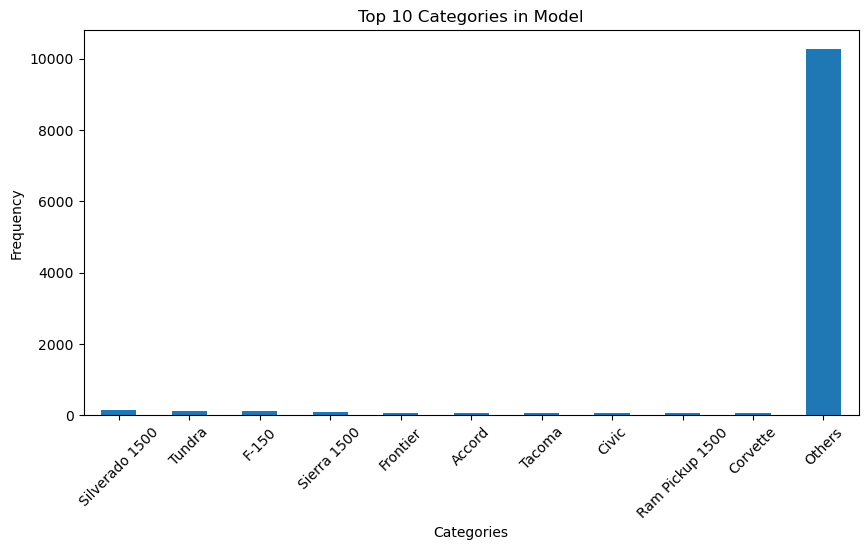

In [492]:
# lets take top 10 , and place remaining categories in 'Others'
top_n = 10
top_values = df['Model'].value_counts().nlargest(top_n)
top_values['Others'] = df['Model'].value_counts()[top_n:].sum()

top_values.plot(kind='bar', figsize=(10, 5), title=f"Top {top_n} Categories in Model")
plt.ylabel("Frequency")
plt.xlabel("Categories")
plt.xticks(rotation=45)
plt.show()

Still we cannot draw insights from this plot. So lets visualize only top 10

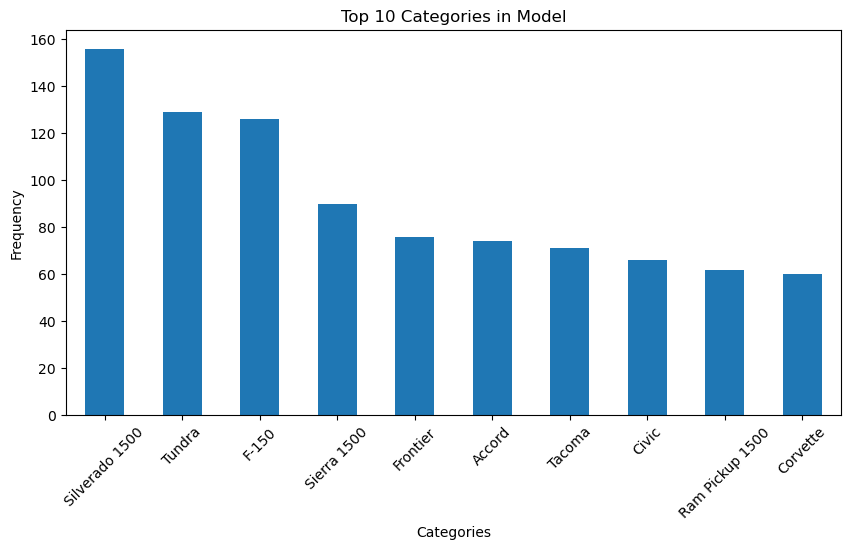

In [490]:
top_n = 10
top_values = df['Model'].value_counts().nlargest(top_n)
#top_values['Others'] = df['Model'].value_counts()[top_n:].sum()

top_values.plot(kind='bar', figsize=(10, 5), title=f"Top {top_n} Categories in Model")
plt.ylabel("Frequency")
plt.xlabel("Categories")
plt.xticks(rotation=45)
plt.show()

#### Observation:
silverado 1500 Model has the max cars


### Analysis of Fuel_type column

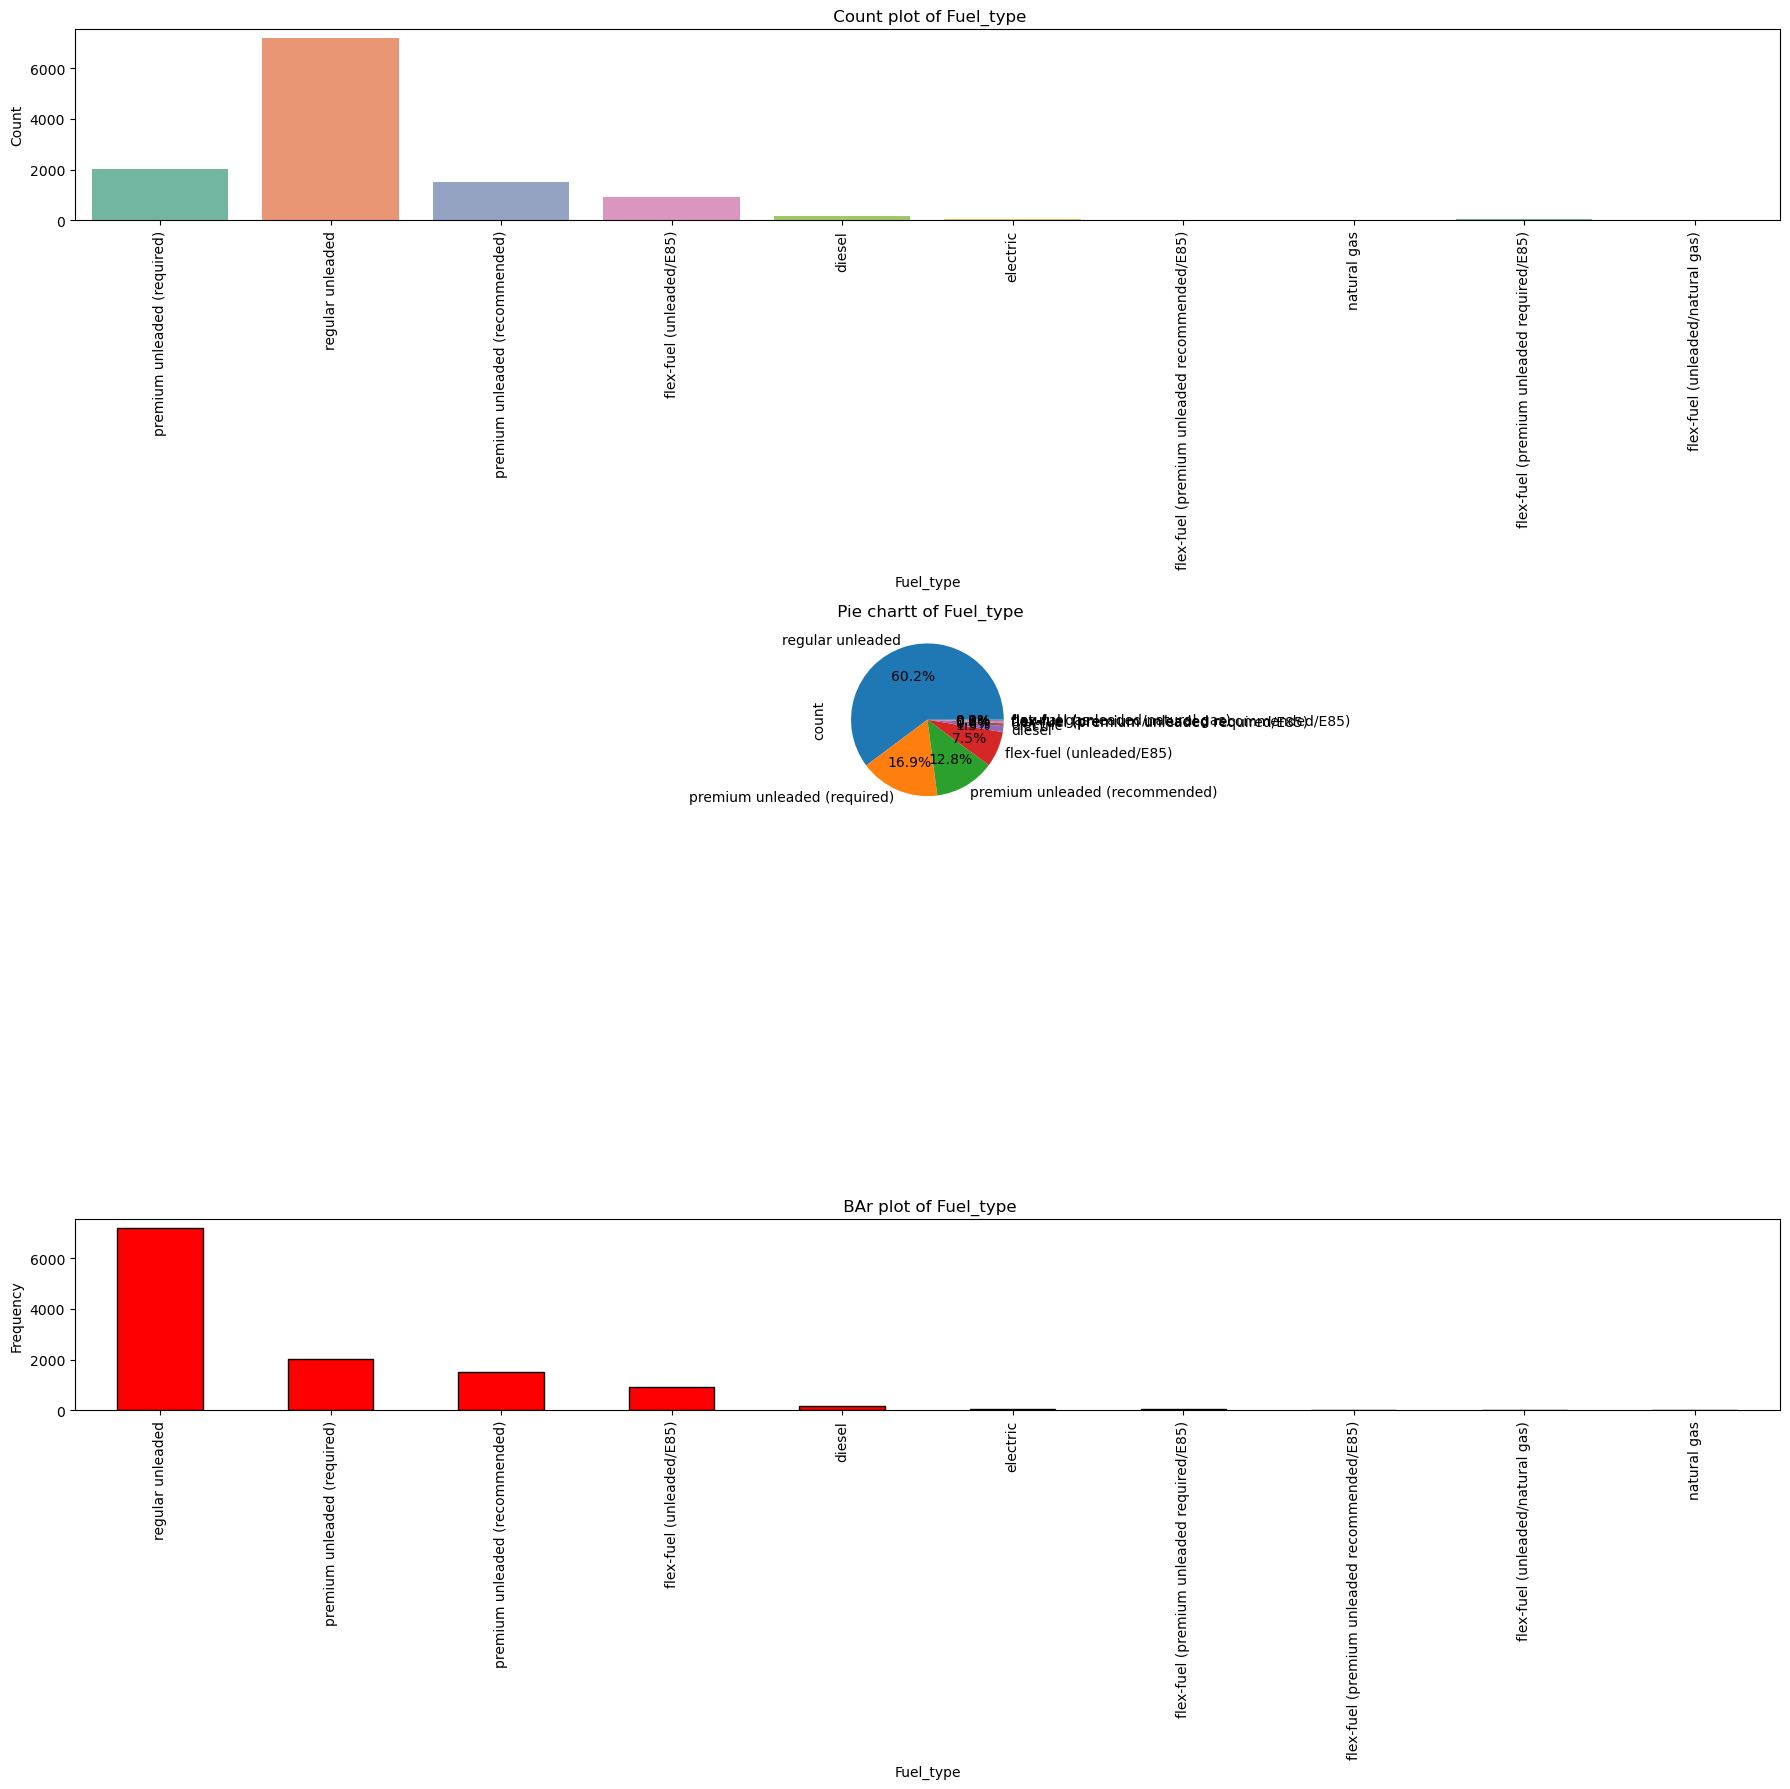

In [500]:
plot_categorical_analysis(cat_df,'Fuel_type')

#### Observation:
maximum i.e. 60.2 % cars have fuel type as regular unleaded

### Analysis of Transmission_Type column

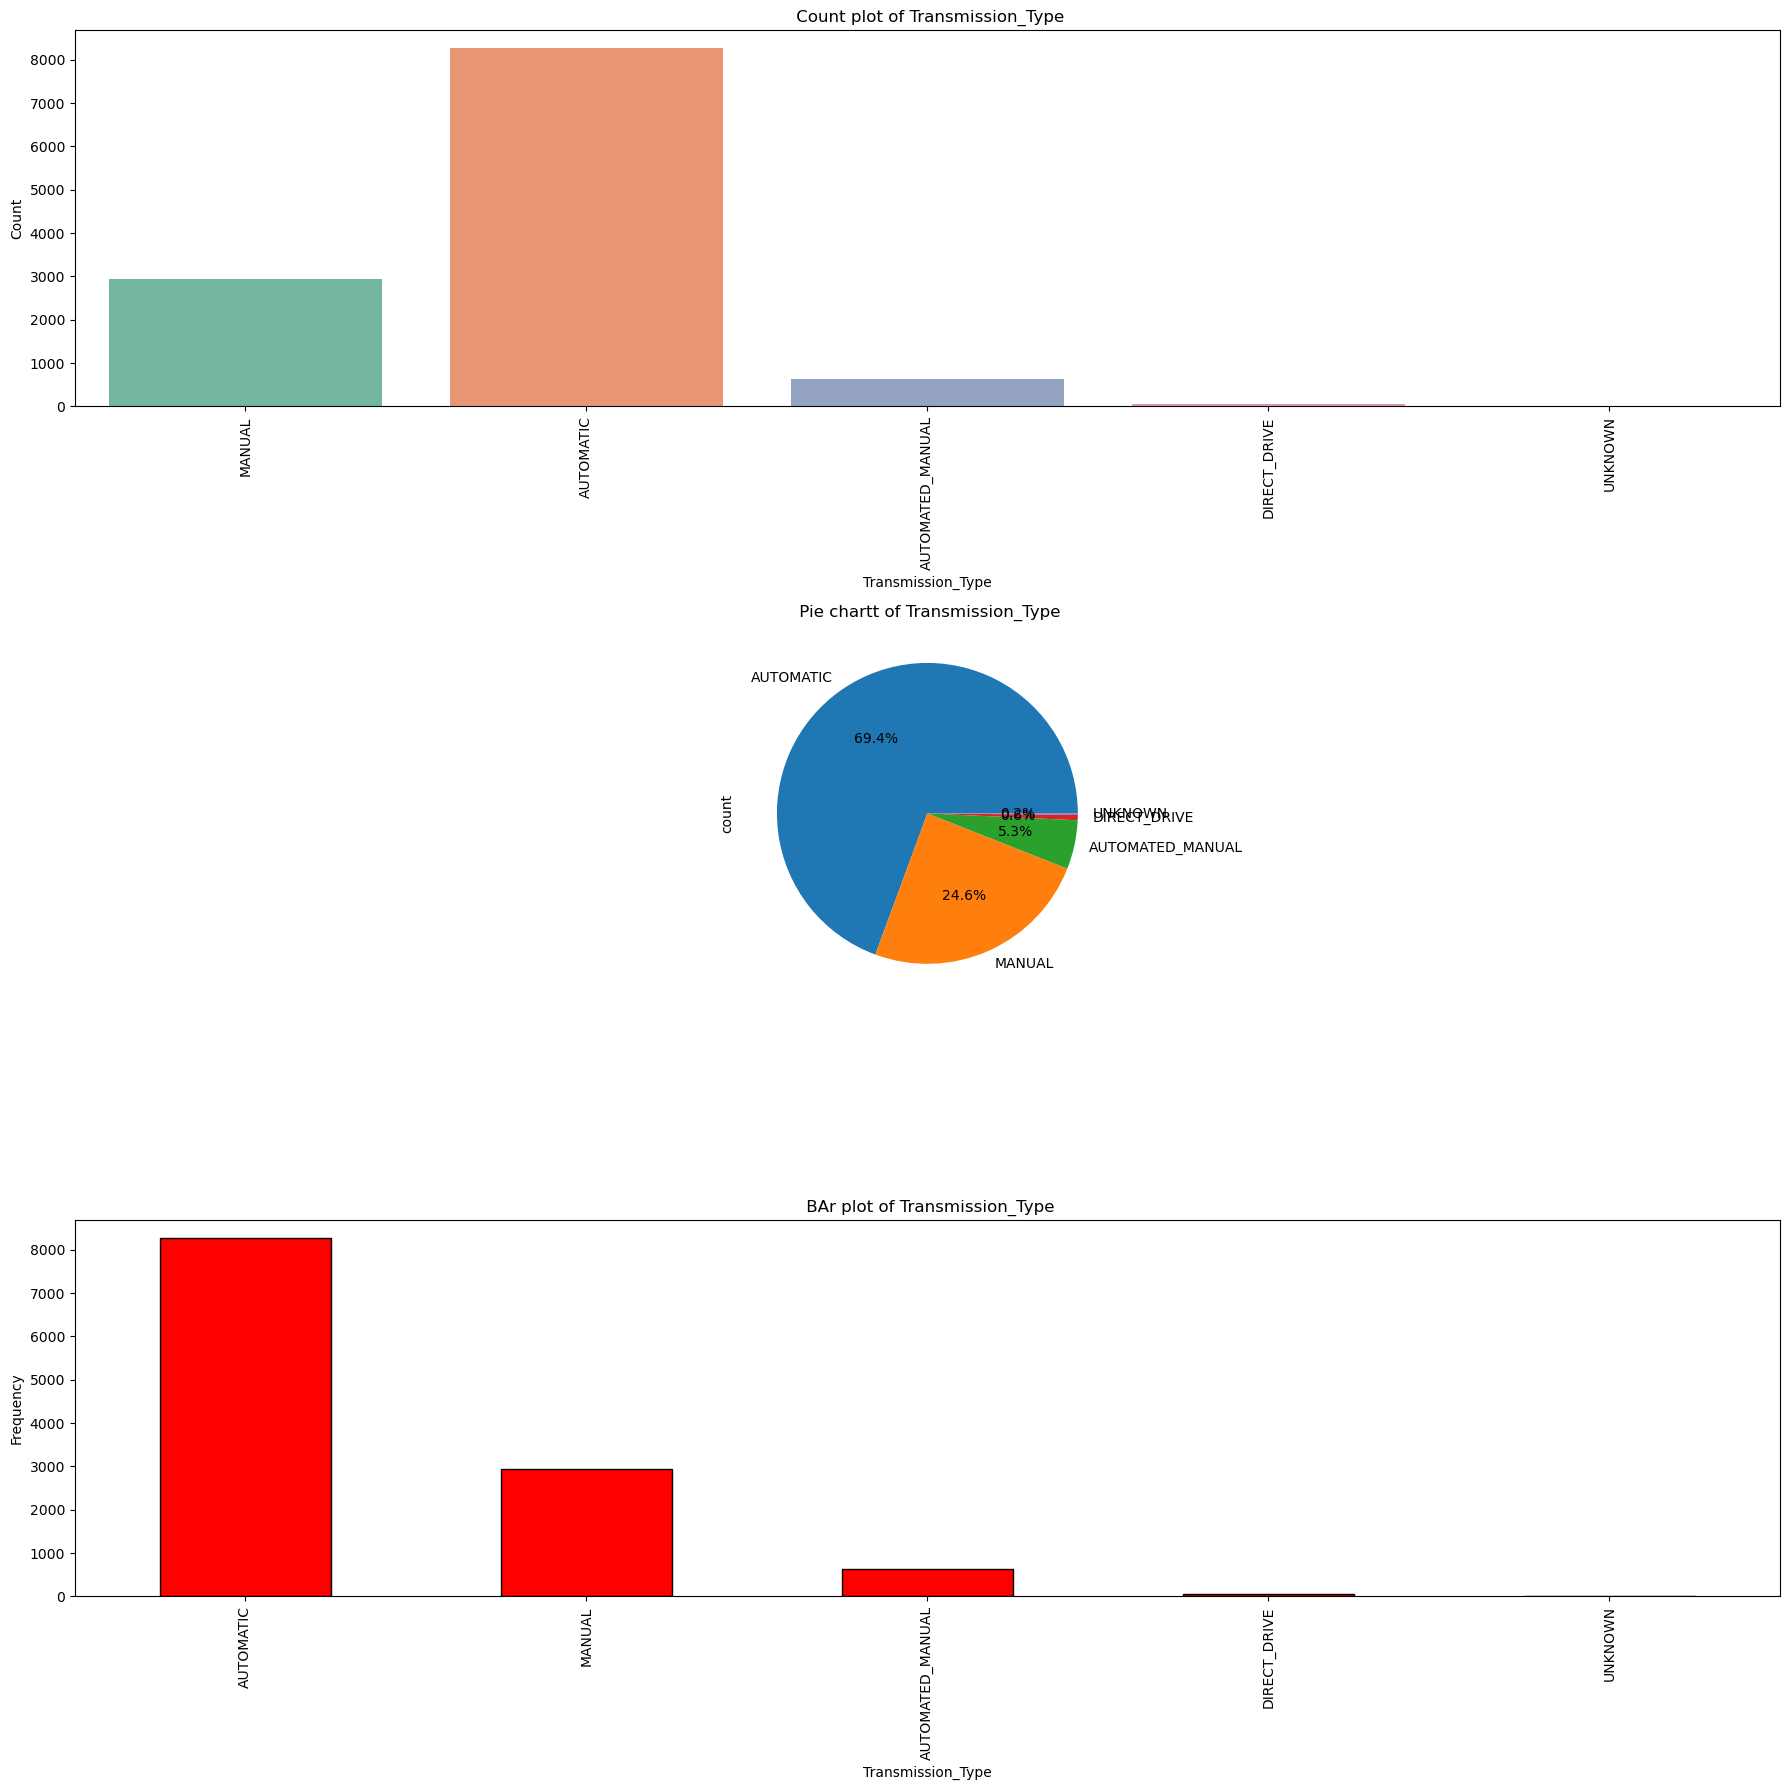

In [506]:
plot_categorical_analysis(cat_df,'Transmission_Type')


#### Observation:
there are many automatic cars as compared to the cars that are manual.69.4% cars are automatic

### Analysis of Driven_Wheels column

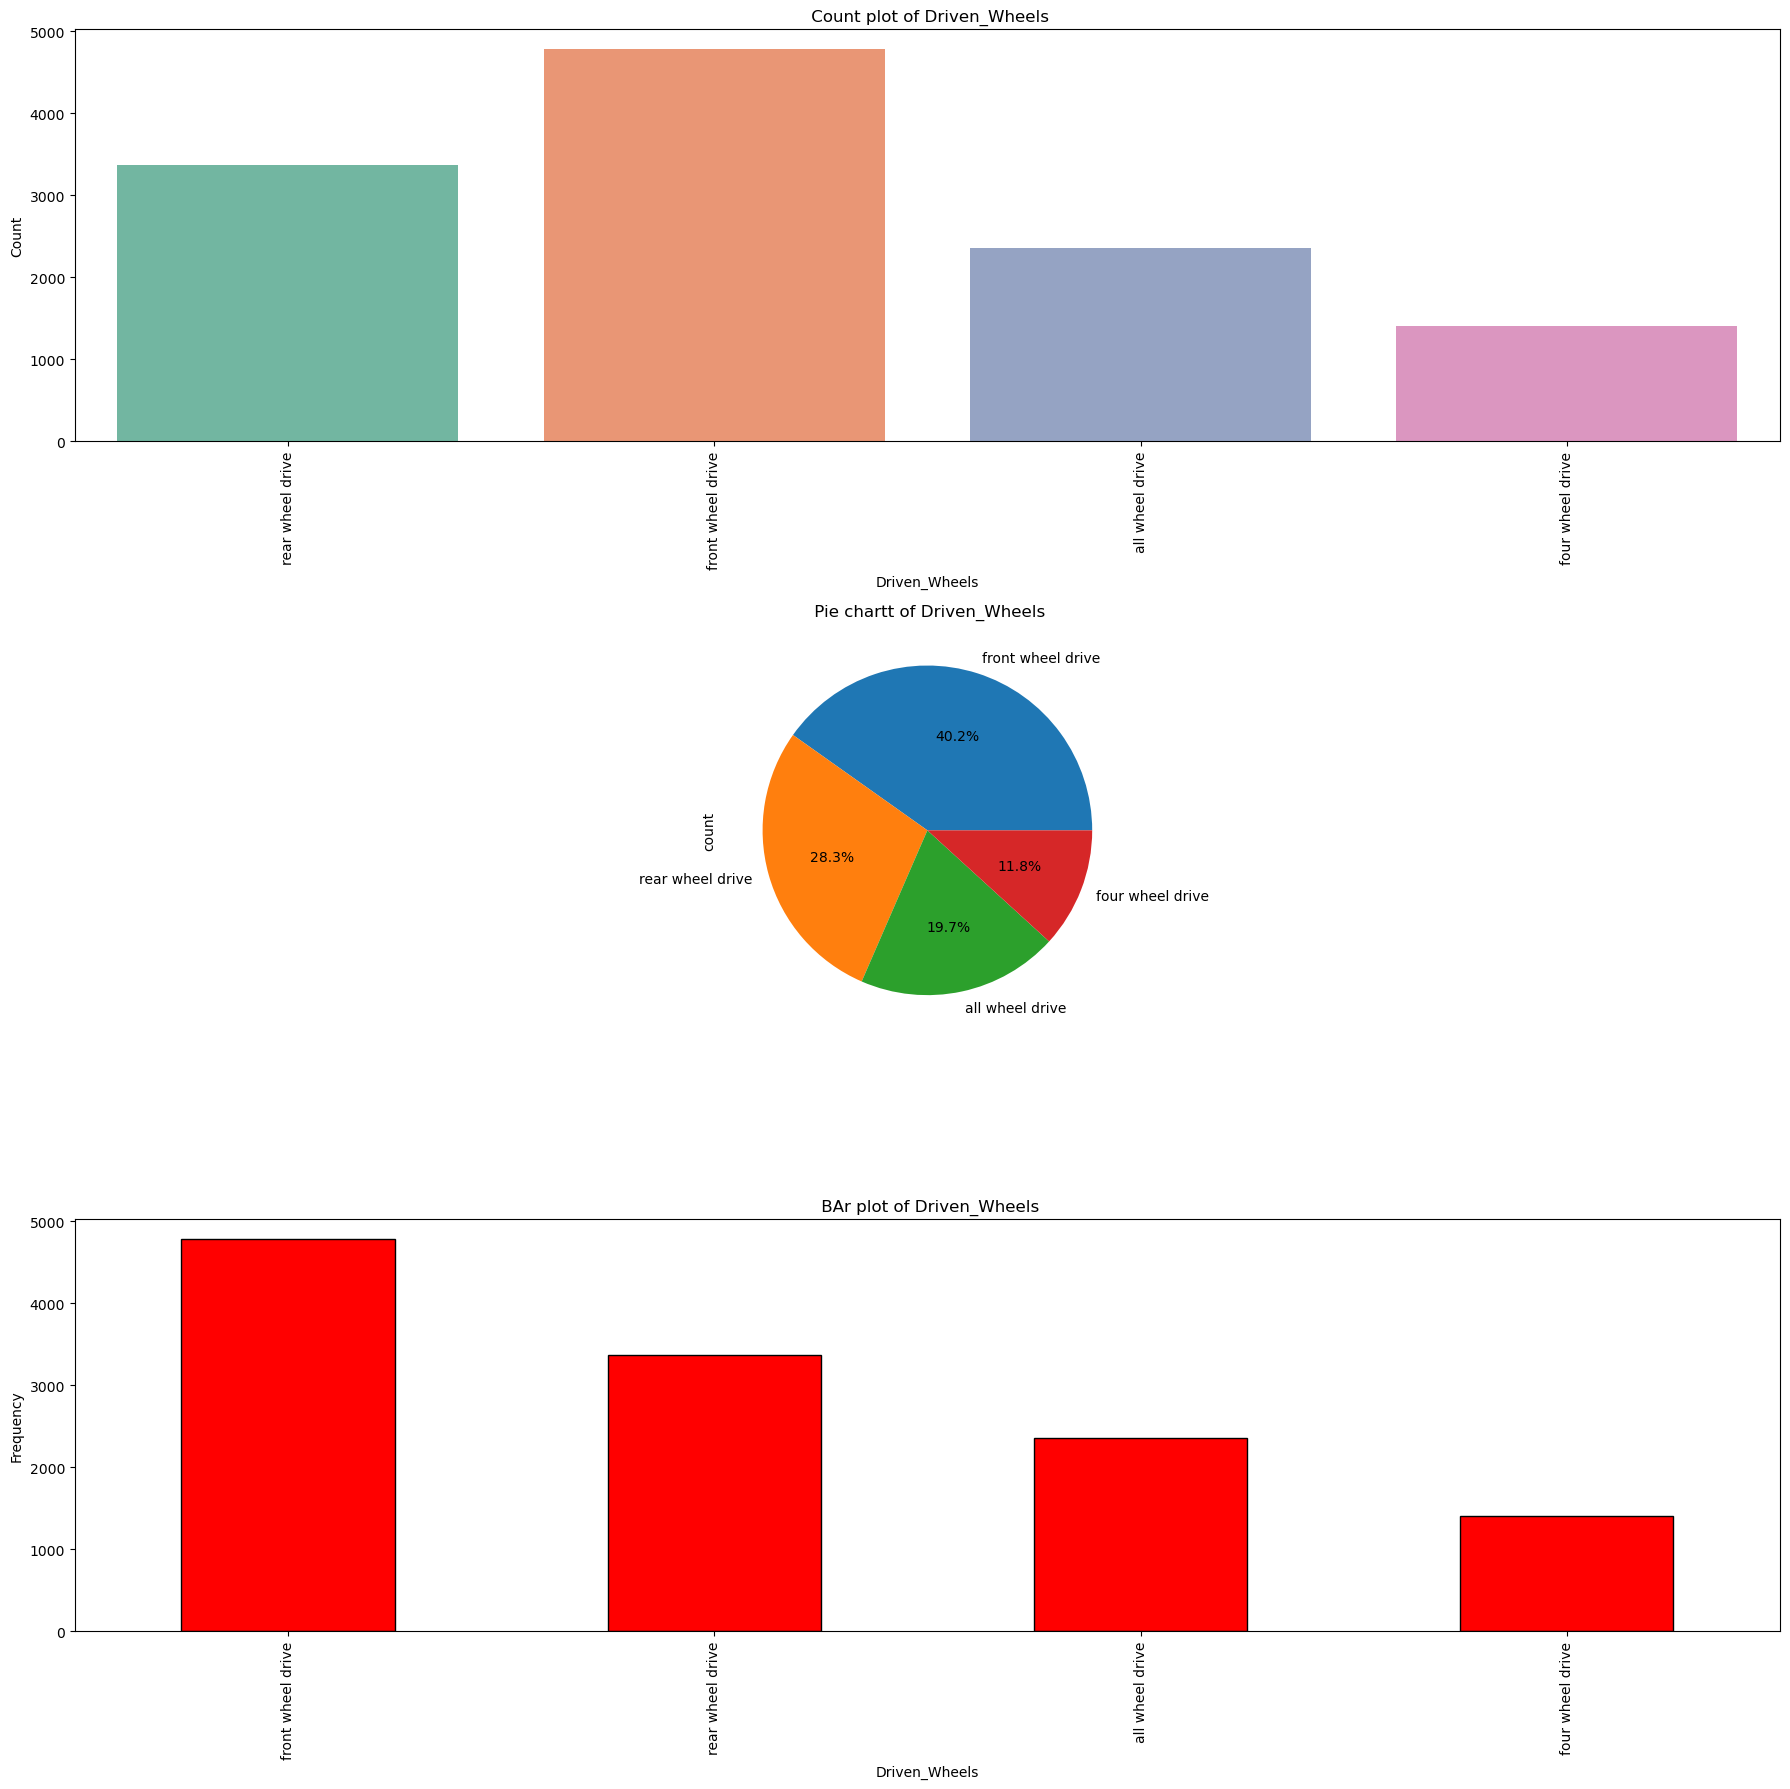

In [510]:
plot_categorical_analysis(cat_df,'Driven_Wheels')

#### Observation:
maximux i.e. 40.2% cars have front wheel drive as driven wheels

### Analysis of Market_Category column

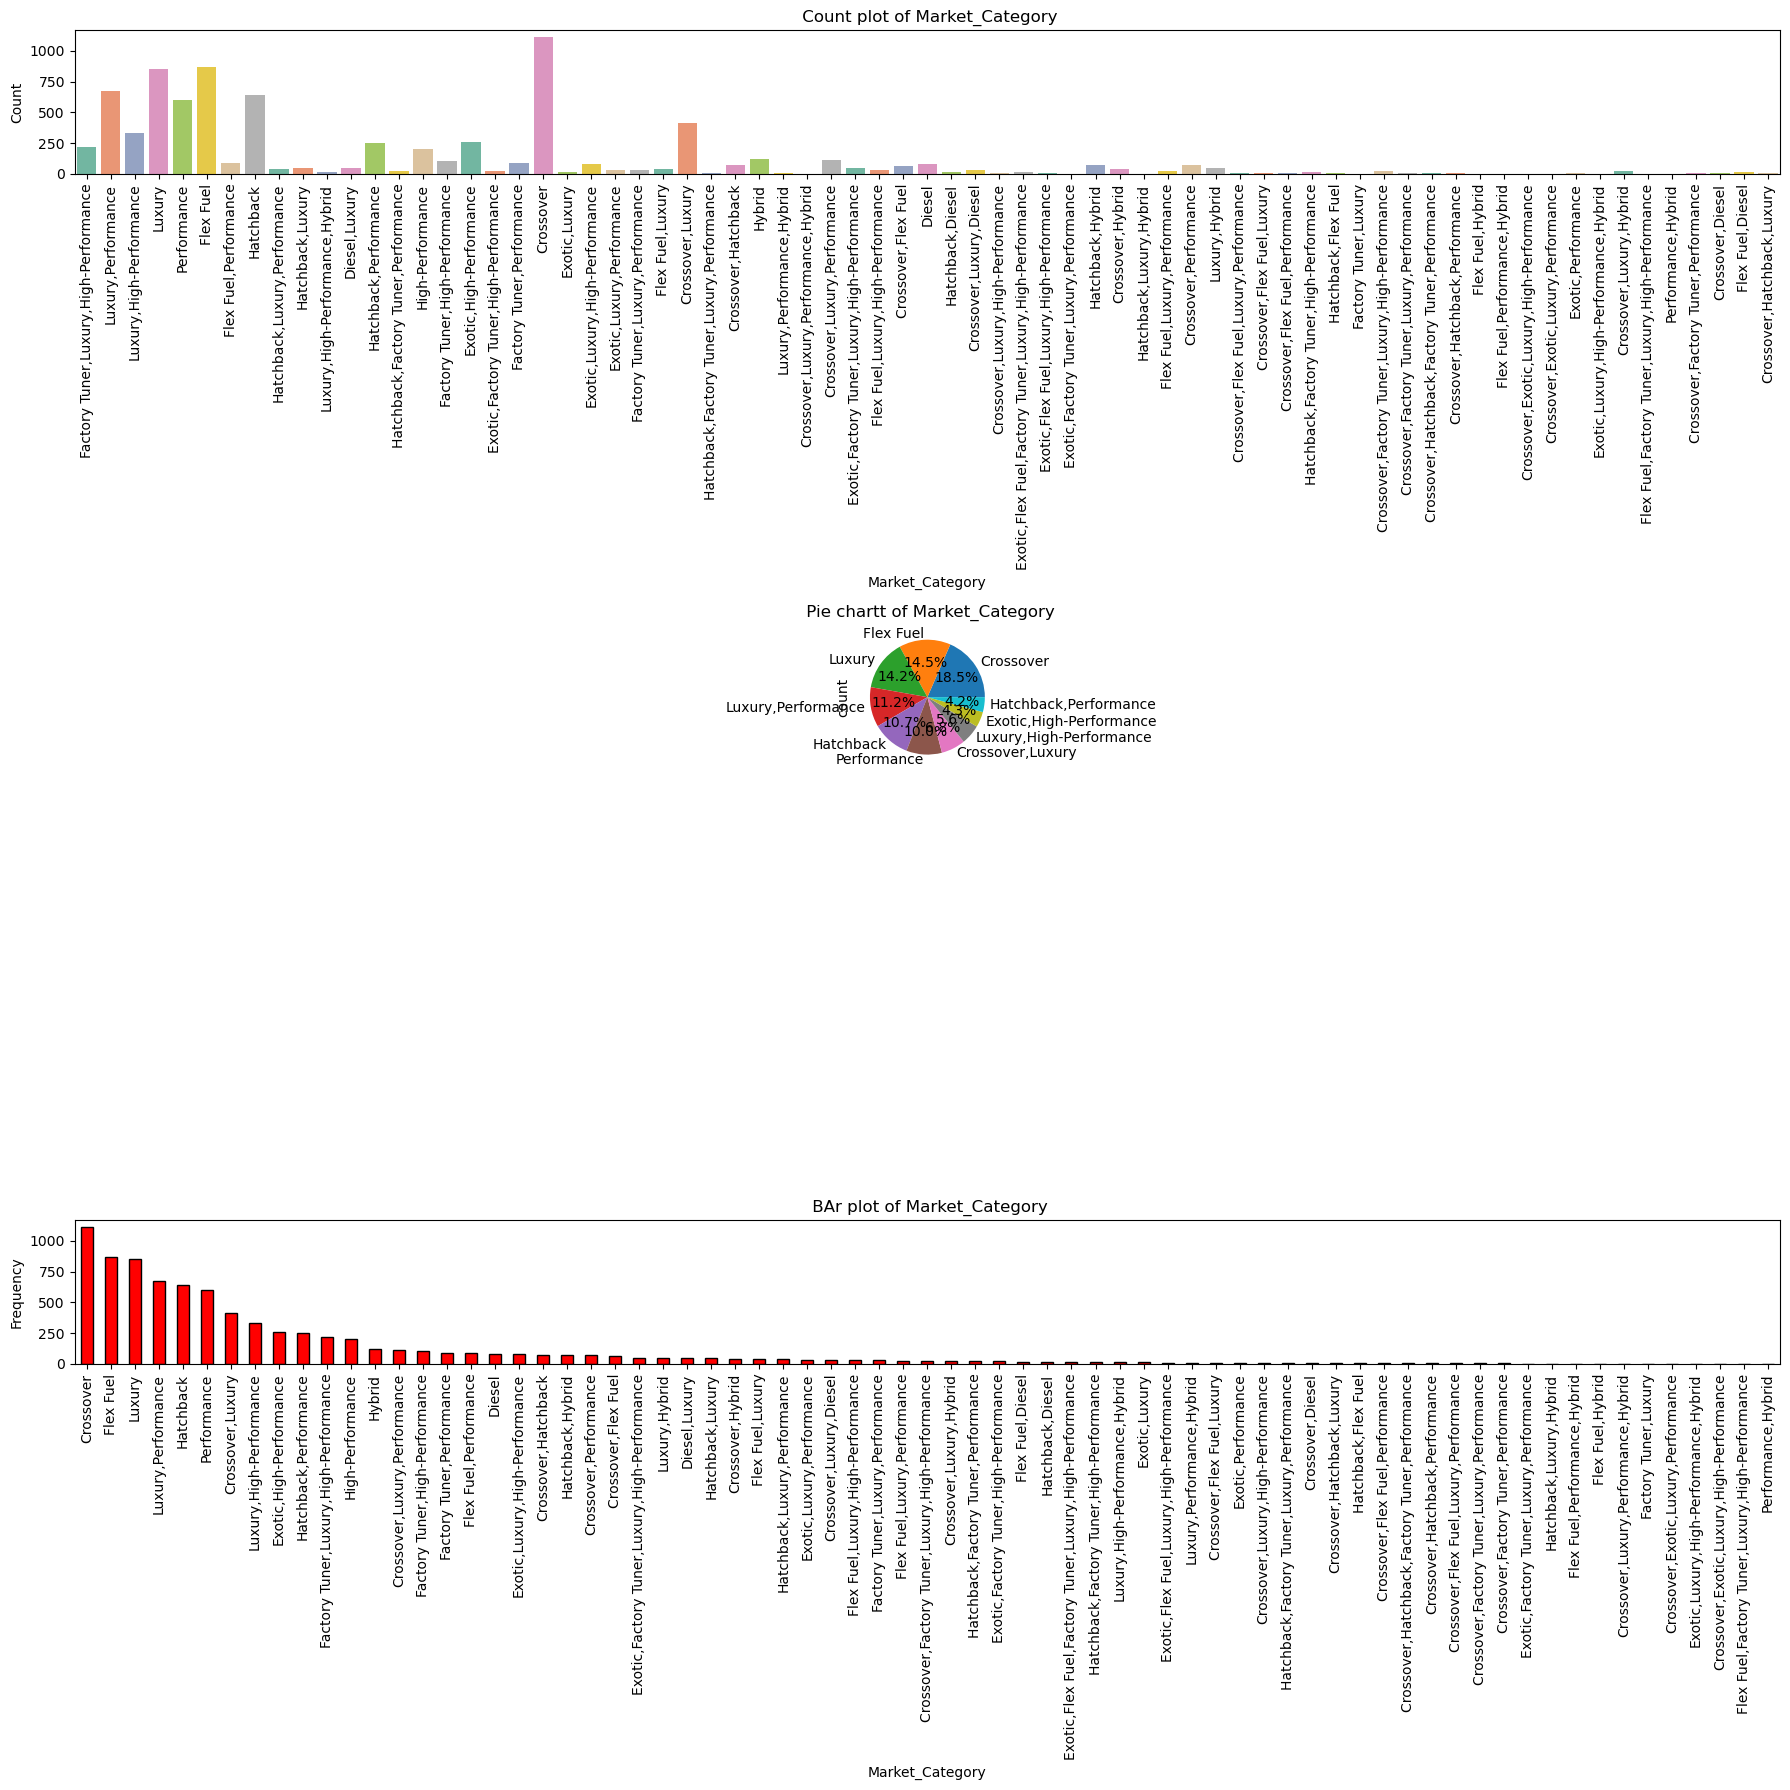

In [515]:
plot_categorical_analysis(cat_df,'Market_Category')

#### Observation:
Maximum cars are of 'crossover' market category.

### Analysis of Vehicle_Size column

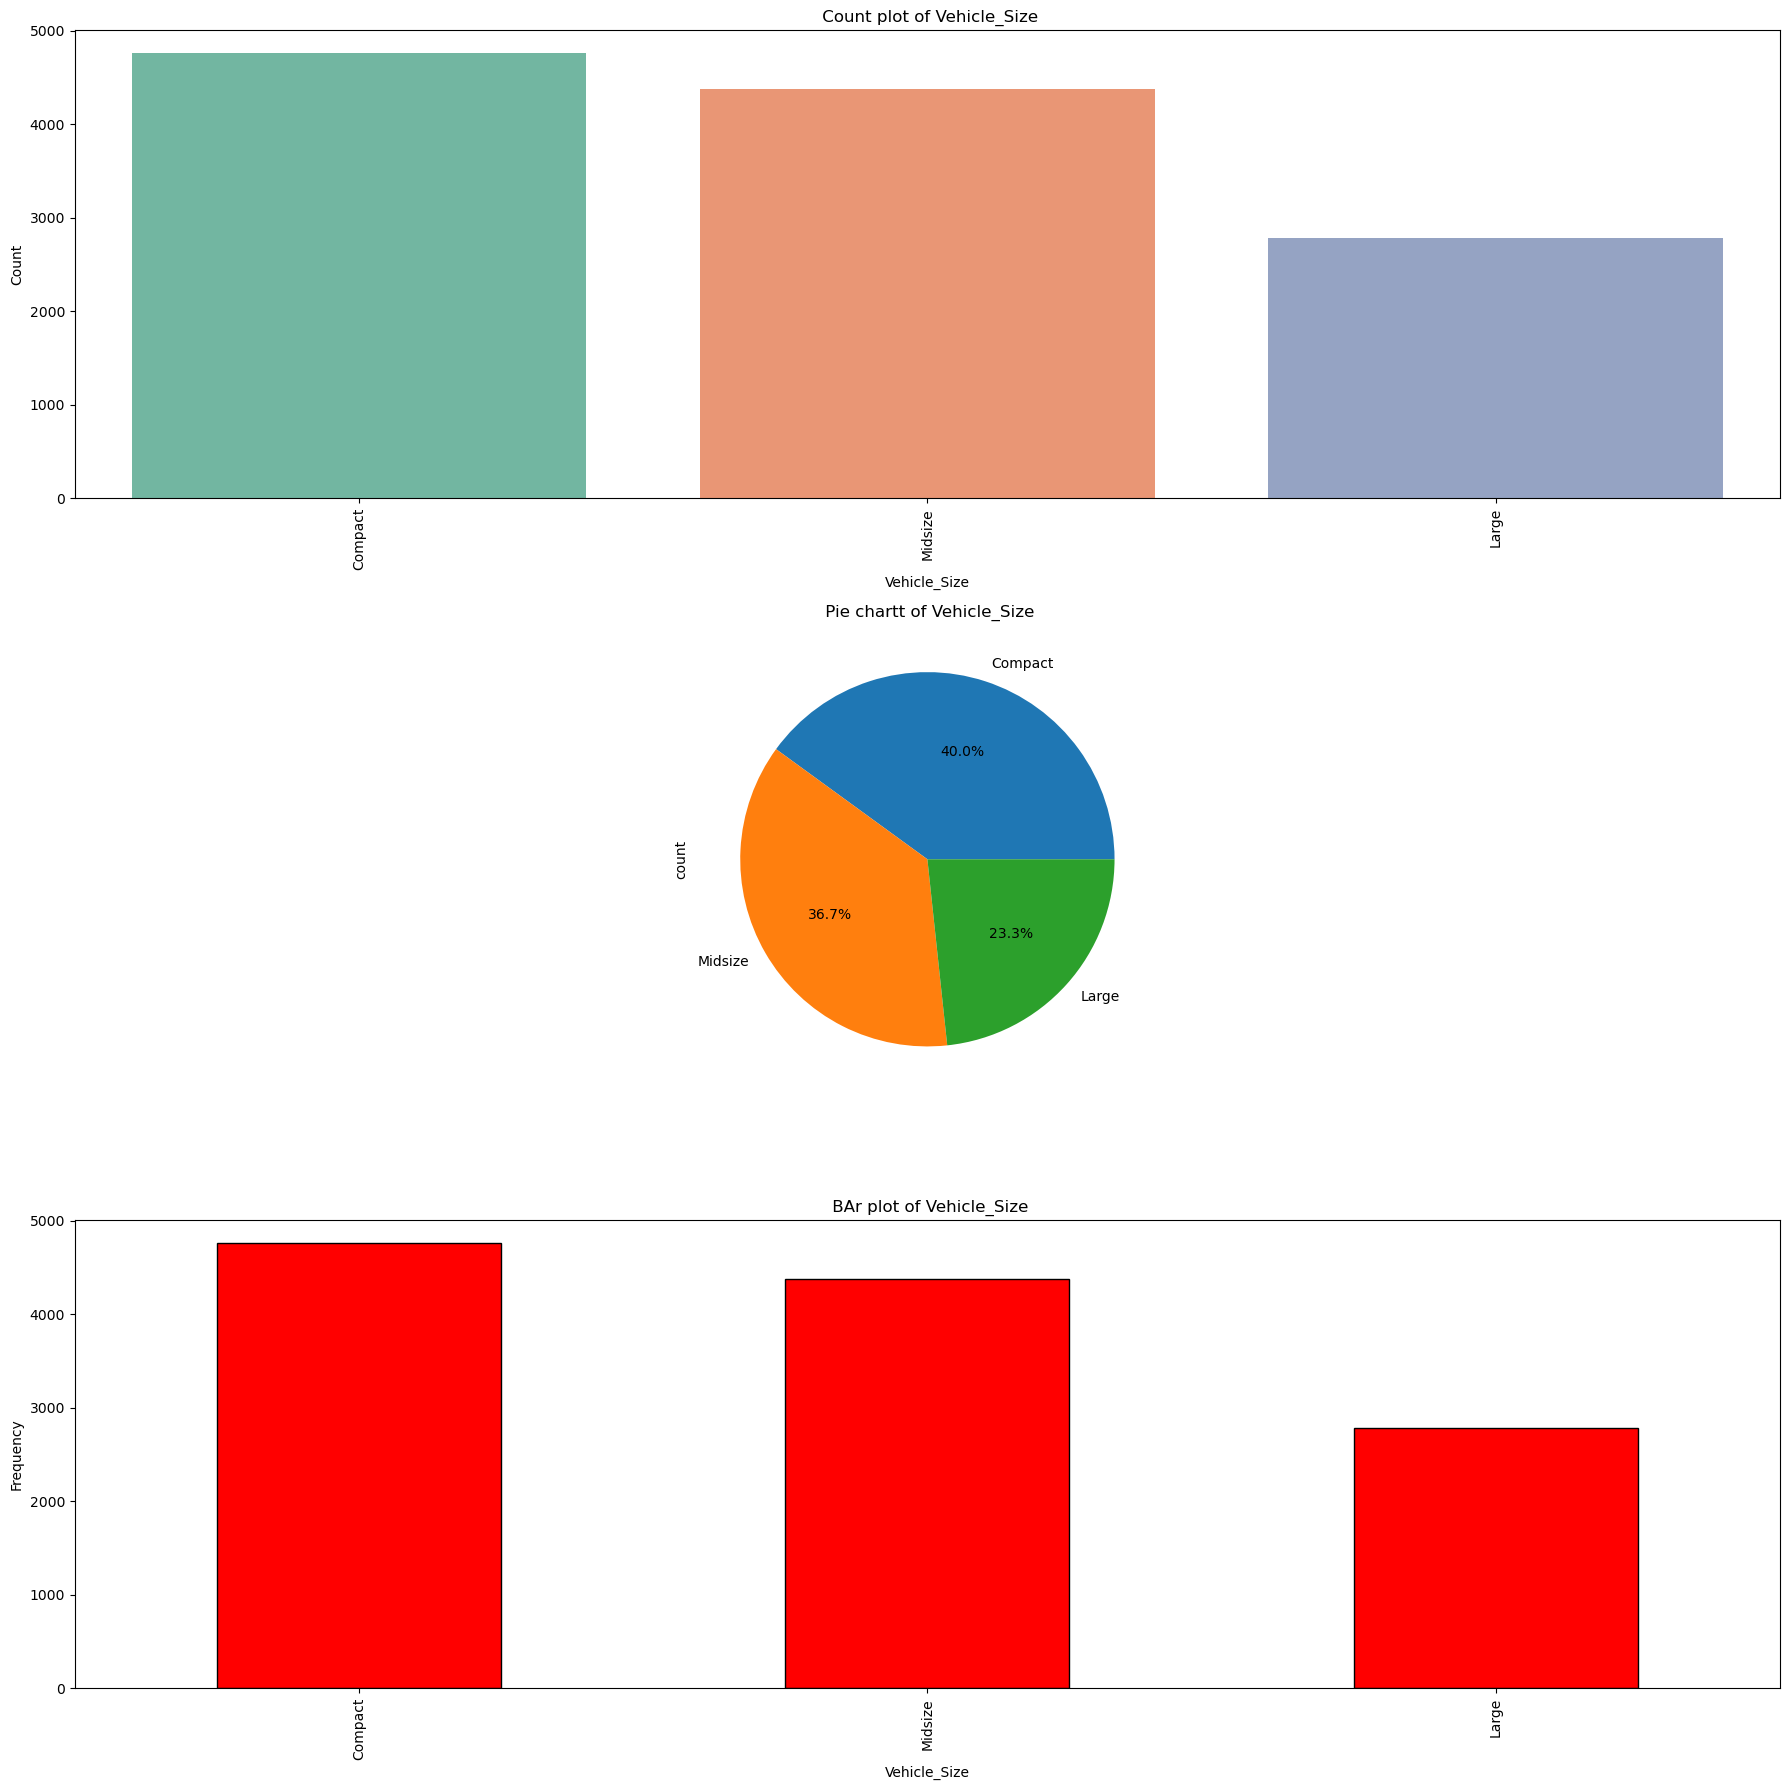

In [519]:
plot_categorical_analysis(cat_df,'Vehicle_Size')

#### Observation:
maximum cars are of compact size

### Analysis of Vehicle_Style column

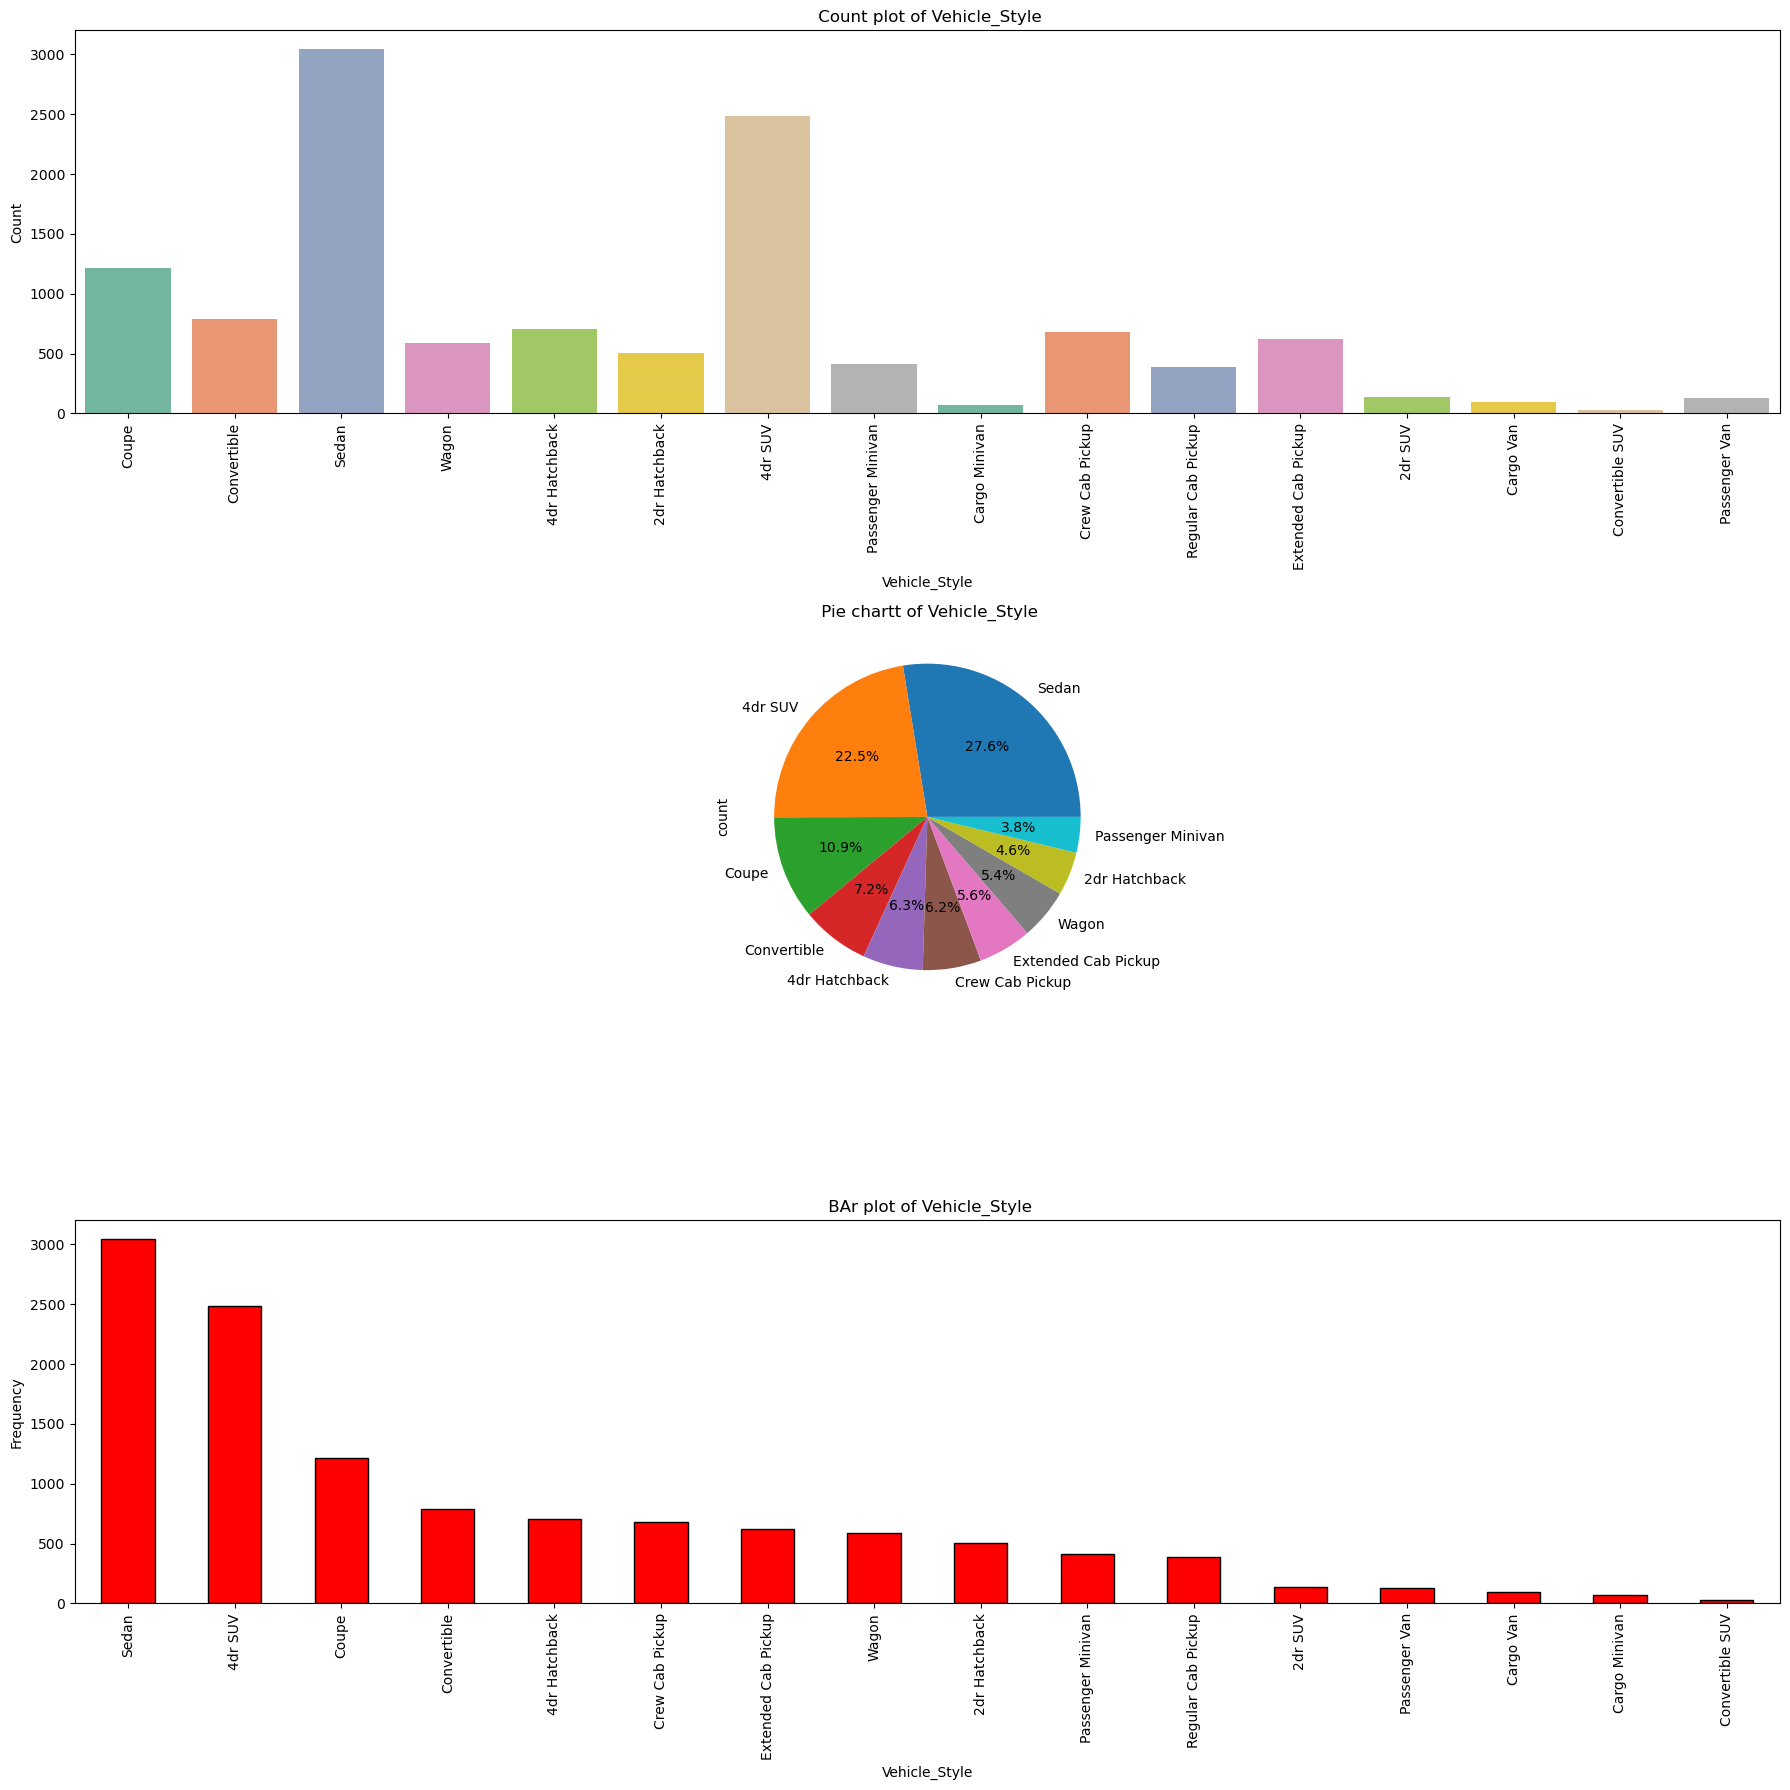

In [523]:
plot_categorical_analysis(cat_df,'Vehicle_Style')

#### Observation:
Maximum cars are of Sedan Style

# Bi Variate / Multi variate Analysis 

<Axes: >

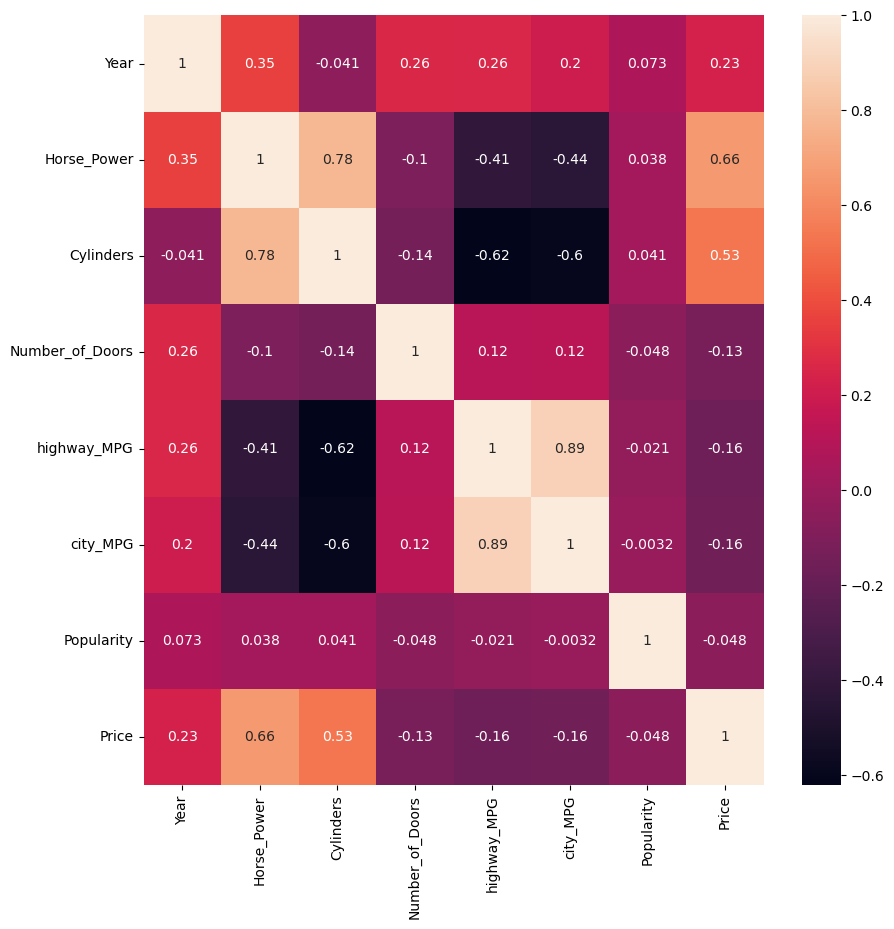

In [431]:
# Heatmap for Numerical columns to check the corelation betwwen columns
plt.figure(figsize = (10,10))
heatmap_data = numerical_df.corr()
sns.heatmap(heatmap_data,annot = True)

- From the heatmap, we can observe that city_mpg and Highway_mpg is having strong correlation.
- Also,cylinder and Horse Power are having strong relation with each Other

<Axes: xlabel='highway_MPG', ylabel='city_MPG'>

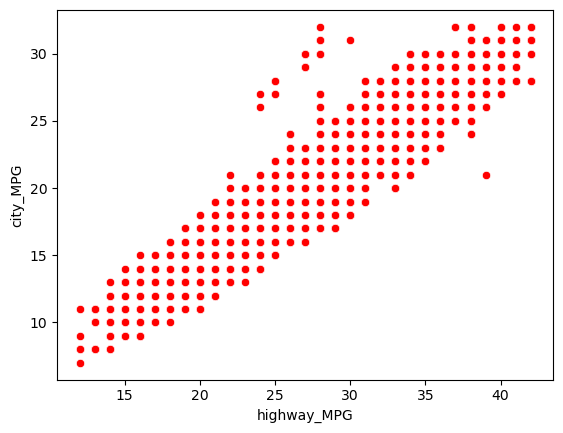

In [437]:
# Scatter plot for city mpg and highway mpg
sns.scatterplot(x = 'highway_MPG',y = 'city_MPG', data = df_cleaned,color = 'red')

<Axes: xlabel='Cylinders', ylabel='Horse_Power'>

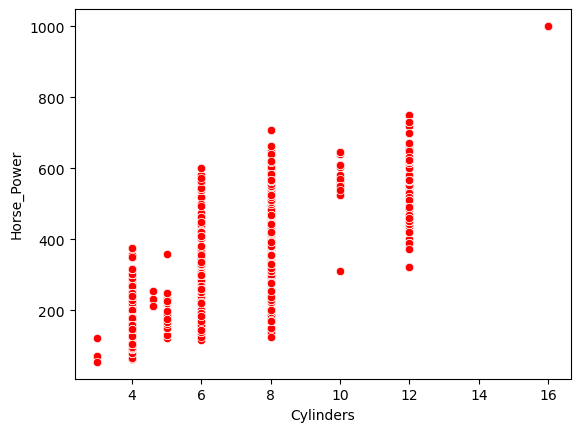

In [439]:
sns.scatterplot(x = 'Cylinders',y = 'Horse_Power', data = df_cleaned,color = 'red')

In [ ]:
# Observation : 
1. The car prices are right-skewed, meaning most cars are priced in the lower range, while a few luxury cars raise the average significantly.
2. The year of manufacture shows that most cars are relatively new (post-2012), and older cars appear as outliers on the left side of the box plot.
3. Horsepower is positively correlated with price; cars with higher horsepower generally cost more. Outliers are seen on the higher end of the distribution.
4. Mileage has a negative correlation with price – the higher the mileage, the lower the resale value of the car.

5.Fuel type is mostly petrol and diesel, with electric and hybrid cars being rare but priced higher.

Automatic transmission vehicles are slightly more expensive than manual ones and are more common in high-end brands.

The brand or make of the car significantly affects price – premium brands like BMW, Audi, and Mercedes command much higher prices than economy brands like Ford or Toyota.

The majority of the cars have 4 doors, with 2-door cars typically being sports or luxury models with higher price tags.

Drive type (e.g., AWD vs FWD) also impacts price, with AWD being common in SUVs and luxury cars.

From the correlation heatmap, horsepower, engine size, and year have strong positive relationships with price, while mileage negatively impacts price.